# P01_1_EDA_Categ

In [1]:
import pandas as pd
import numpy as np
import regex as re
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import pickle

import matplotlib.pyplot as plt
import re

In [2]:
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
import pandas as pd
import numpy as np
import regex as re
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import pickle
from sklearn.pipeline import make_pipeline, Pipeline

import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import re
from tqdm import tqdm
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics

In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix


from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer

In [5]:
%config InlineBackend.figure_format = 'retina'

In [6]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import FunctionTransformer

from sklearn.compose import ColumnTransformer

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

# Read data set

In [9]:
file_path = "../DataSet/"
file_name = "exercise_40_train.csv"
df = pd.read_csv(file_path+file_name)

In [10]:
df.shape

(40000, 101)

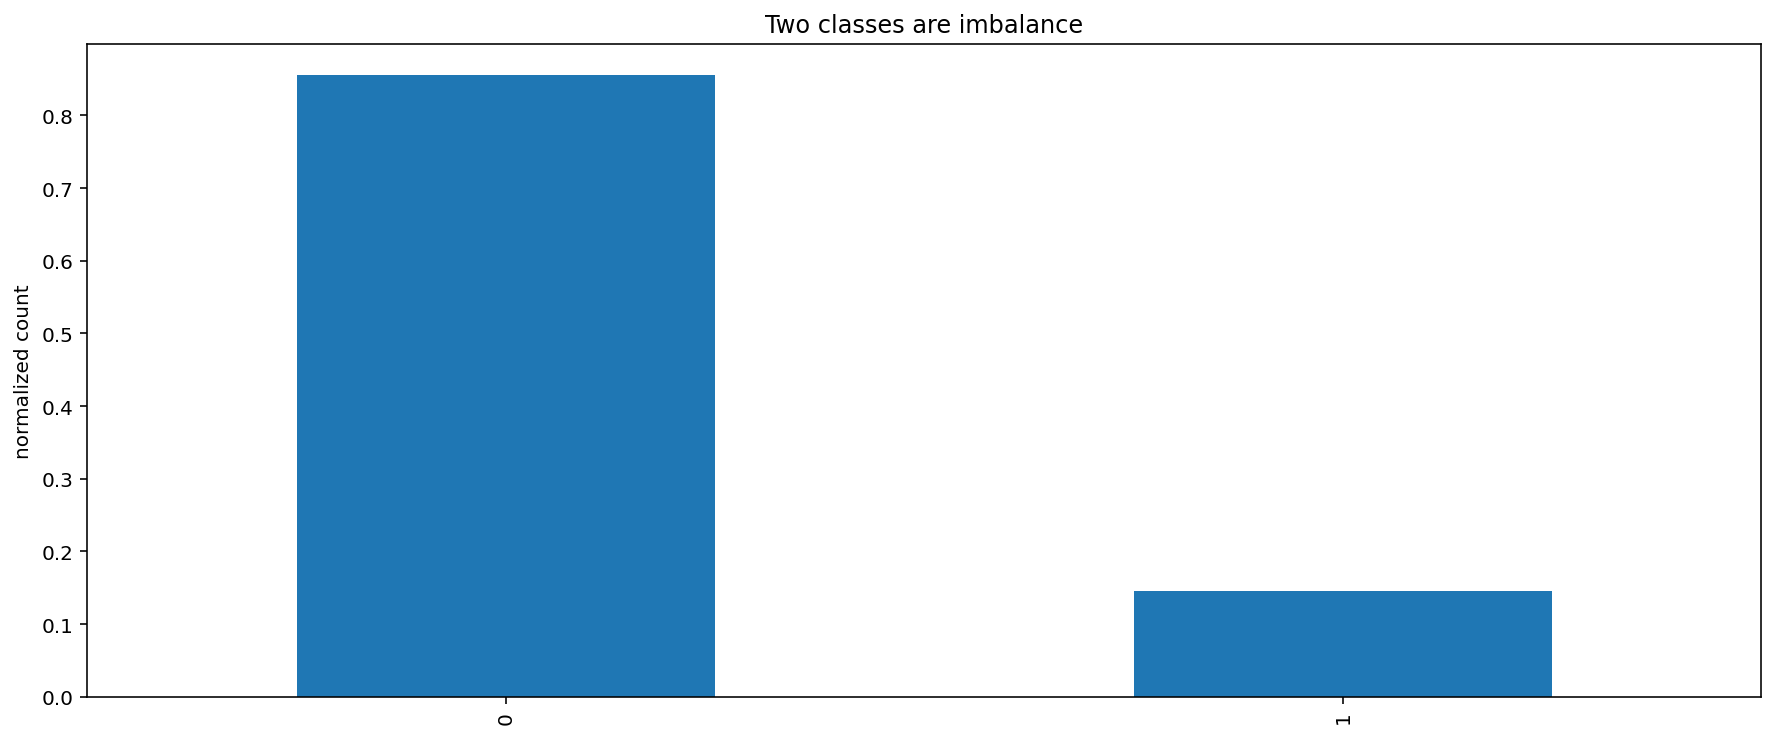

In [11]:
df['y'].value_counts(normalize=True).plot(kind='bar',figsize=(15,6))
plt.ylabel('normalized count')
plt.title('Two classes are imbalance')
plt.savefig("../Figures/plot_01_1_imbalancedata.png")

plt.show()

# Check out the object columns, number of uniques and number of NaNs

In [12]:
df_categ = df.select_dtypes(include=['object'])
print(df_categ.columns)
columns_obj_dtype = df_categ.columns

# print('columns_obj_dtype = ', columns_obj_dtype)

print(100*'=')


number_of_Obj_cols_with_nan = 0
columns_obj_dtype_NaN = []


for col in columns_obj_dtype:
    if df_categ[col].isnull().sum() != 0:
        number_of_Obj_cols_with_nan = number_of_Obj_cols_with_nan + 1
        
        columns_obj_dtype_NaN.append(col)
        
        print('NaNs % in ', col, '=', (df_categ[col].isnull().sum())*100/(df_categ.shape[0]), '%',
              '\nNumber of uniqs =', df_categ[col].nunique(), '\n')
print('number_of_Obj_cols_with_nan ', number_of_Obj_cols_with_nan)

Index(['x3', 'x7', 'x19', 'x24', 'x31', 'x33', 'x39', 'x60', 'x65', 'x77',
       'x93', 'x99'],
      dtype='object')
NaNs % in  x24 = 9.64 % 
Number of uniqs = 2 

NaNs % in  x33 = 17.9275 % 
Number of uniqs = 51 

NaNs % in  x77 = 23.1425 % 
Number of uniqs = 7 

NaNs % in  x99 = 32.09 % 
Number of uniqs = 1 

number_of_Obj_cols_with_nan  4


In [13]:
df_categ['target'] = df[['y']]

In [14]:
# target = 
# df_categ = df_categ.join(target)
df_categ.head()

,x3,x7,x19,x24,x31,x33,x39,x60,x65,x77,x93,x99,target
0,Wed,0.0062%,$-908.650758424405,female,no,Colorado,5-10 miles,August,farmers,mercedes,no,yes,0
1,Friday,0.0064%,$-1864.9622875143,male,no,Tennessee,5-10 miles,April,allstate,mercedes,no,yes,1
2,Thursday,-8e-04%,$-543.187402955527,male,no,Texas,5-10 miles,September,geico,subaru,no,yes,1
3,Tuesday,-0.0057%,$-182.626380634258,male,no,Minnesota,5-10 miles,September,geico,nissan,no,yes,0
4,Sunday,0.0109%,$967.007090837503,male,yes,New York,5-10 miles,January,geico,toyota,yes,yes,0


In [15]:
df_categ = df_categ.drop(['x7','x19'],axis=1)
df_categ.head()

,x3,x24,x31,x33,x39,x60,x65,x77,x93,x99,target
0,Wed,female,no,Colorado,5-10 miles,August,farmers,mercedes,no,yes,0
1,Friday,male,no,Tennessee,5-10 miles,April,allstate,mercedes,no,yes,1
2,Thursday,male,no,Texas,5-10 miles,September,geico,subaru,no,yes,1
3,Tuesday,male,no,Minnesota,5-10 miles,September,geico,nissan,no,yes,0
4,Sunday,male,yes,New York,5-10 miles,January,geico,toyota,yes,yes,0


check out the unique values 

In [16]:
df_categ['x3'].unique()

array(['Wed', 'Friday', 'Thursday', 'Tuesday', 'Sunday', 'Saturday',
       'Sat', 'Wednesday', 'Sun', 'Tue', 'Thur', 'Monday', 'Fri', 'Mon'],
      dtype=object)

In [17]:
for col in df_categ.columns:
    print(df_categ[col].unique(),'\n')

['Wed' 'Friday' 'Thursday' 'Tuesday' 'Sunday' 'Saturday' 'Sat' 'Wednesday'
 'Sun' 'Tue' 'Thur' 'Monday' 'Fri' 'Mon'] 

['female' 'male' nan] 

['no' 'yes'] 

['Colorado' 'Tennessee' 'Texas' 'Minnesota' 'New York' 'Florida'
 'Nebraska' 'California' nan 'North Dakota' 'Arizona' 'Alabama' 'Ohio'
 'Pennsylvania' 'Iowa' 'Indiana' 'Vermont' 'Arkansas' 'Massachusetts'
 'Illinois' 'Georgia' 'West Virginia' 'Connecticut' 'Virginia'
 'North Carolina' 'Montana' 'New Mexico' 'New Hampshire' 'Michigan' 'DC'
 'Washington' 'Louisiana' 'Kentucky' 'Utah' 'Missouri' 'Oregon' 'Oklahoma'
 'Nevada' 'Wisconsin' 'New Jersey' 'Maryland' 'Maine' 'Alaska' 'Idaho'
 'Wyoming' 'Rhode Island' 'South Dakota' 'Mississippi' 'Kansas' 'Delaware'
 'Hawaii' 'South Carolina'] 

['5-10 miles'] 

['August' 'April' 'September' 'January' 'December' 'March' 'July'
 'November' 'June' 'February' 'October' 'May'] 

['farmers' 'allstate' 'geico' 'progressive' 'esurance'] 

['mercedes' 'subaru' 'nissan' 'toyota' nan 'chevrolet' 'bui

In [18]:
# https://stackoverflow.com/questions/60237488/python-replace-only-exact-word-in-string
def fix_x3(df_categ):
    for i, string in enumerate(df_categ['x3'].values):
        df_categ['x3'].values[i] = re.sub(r'\bTue\b', 'Tuesday', string)

    for i, string in enumerate(df_categ['x3'].values):
        df_categ['x3'].values[i] = re.sub(r'\bSun\b', 'Sunday', string)

    for i, string in enumerate(df_categ['x3'].values):
        df_categ['x3'].values[i] = re.sub(r'\bSat\b', 'Saturday', string)

    for i, string in enumerate(df_categ['x3'].values):
        df_categ['x3'].values[i] = re.sub(r'\bFri\b', 'Friday', string)

    for i, string in enumerate(df_categ['x3'].values):
        df_categ['x3'].values[i] = re.sub(r'\bWed\b', 'Wednesday', string)

    for i, string in enumerate(df_categ['x3'].values):
        df_categ['x3'].values[i] = re.sub(r'\bMon\b', 'Monday', string)

    for i, string in enumerate(df_categ['x3'].values):
        df_categ['x3'].values[i] = re.sub(r'\bThur\b', 'Thursday', string)

In [19]:
df_categ['x3'] = df_categ['x3'].apply(lambda x: re.sub(r'\bTue\b', 'Tuesday', x))
df_categ['x3'] = df_categ['x3'].apply(lambda x: re.sub(r'\bSun\b', 'Sunday', x))
df_categ['x3'] = df_categ['x3'].apply(lambda x: re.sub(r'\bSat\b', 'Saturday', x))
df_categ['x3'] = df_categ['x3'].apply(lambda x: re.sub(r'\bFri\b', 'Friday', x))
df_categ['x3'] = df_categ['x3'].apply(lambda x: re.sub(r'\bWed\b', 'Wednesday', x))
df_categ['x3'] = df_categ['x3'].apply(lambda x: re.sub(r'\bMon\b', 'Monday', x))
df_categ['x3'] = df_categ['x3'].apply(lambda x: re.sub(r'\bThur\b', 'Thursday', x))

In [20]:
df_categ['x3'].unique()

array(['Wednesday', 'Friday', 'Thursday', 'Tuesday', 'Sunday', 'Saturday',
       'Monday'], dtype=object)

In [21]:
targets = df_categ['target']

In [22]:
df_categ.head(2)

,x3,x24,x31,x33,x39,x60,x65,x77,x93,x99,target
0,Wednesday,female,no,Colorado,5-10 miles,August,farmers,mercedes,no,yes,0
1,Friday,male,no,Tennessee,5-10 miles,April,allstate,mercedes,no,yes,1


In [23]:
for col in df_categ.columns:
    if df_categ[col].isnull().sum() != 0:
        print('column is ',col, 'number of nulls is ', df_categ[col].isnull().sum())
        df_categ[col].fillna(df_categ[col].mode()[0], inplace=True)
        print('column was ',col, 'number of nulls is ', df_categ[col].isnull().sum(),'\n')

column is  x24 number of nulls is  3856
column was  x24 number of nulls is  0 

column is  x33 number of nulls is  7171
column was  x33 number of nulls is  0 

column is  x77 number of nulls is  9257
column was  x77 number of nulls is  0 

column is  x99 number of nulls is  12836
column was  x99 number of nulls is  0 



group data and check out the differences

In [24]:
target_grp = df_categ.groupby(['target'])

# X3

In [25]:
target_grp['x3'].value_counts(normalize=True)

target  x3       
0       Tuesday      0.177442
        Wednesday    0.176039
        Monday       0.159605
        Friday       0.136679
        Saturday     0.132000
        Thursday     0.111121
        Sunday       0.107115
1       Wednesday    0.164225
        Friday       0.158711
        Monday       0.152680
        Saturday     0.149750
        Tuesday      0.136998
        Sunday       0.128382
        Thursday     0.109254
Name: x3, dtype: float64

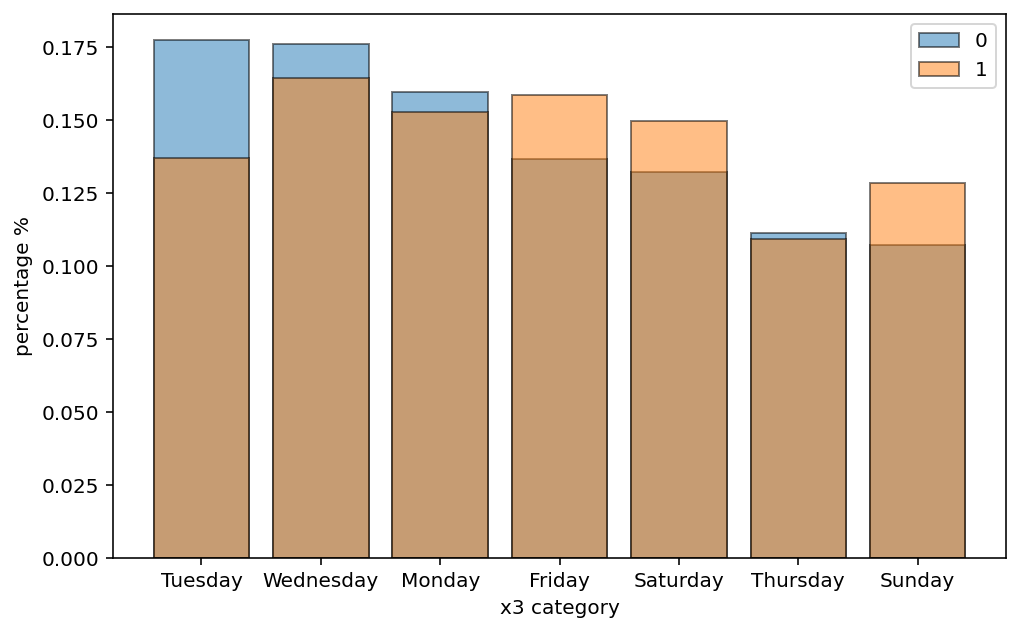

In [26]:
target_grp_x3_0 = target_grp['x3'].value_counts(normalize=True).loc[0]
target_grp_x3_1 = target_grp['x3'].value_counts(normalize=True).loc[1]


target_grp_x3_0_pd = pd.DataFrame(target_grp['x3'].value_counts(normalize=True).loc[0])
target_grp_x3_1_pd = pd.DataFrame(target_grp['x3'].value_counts(normalize=True).loc[1])

plt.figure(figsize=(8,5))
plt.bar(target_grp_x3_0_pd.index, 
        target_grp_x3_0_pd['x3'],
        alpha=0.5, ec='k', label='0')

plt.bar(target_grp_x3_1_pd.index, 
        target_grp_x3_1_pd['x3'],
        alpha=0.5, ec='k', label='1')

plt.xlabel('x3 category'); plt.ylabel('percentage %')
plt.legend()
plt.savefig("../Figures/plot_01_1_EDA_1.png")
plt.show()

clearly is seen that the days including Tuesday, wend, and Monday have more than 0 and in 3 days including Friday, Saturday, and Sunday the number of 1 are higher. make a bar function as follow and call it on column.

In [27]:
def plot_bars(df, col_name, fig_number, figsiz):
    

    target_grp_0 = target_grp[col_name].value_counts(normalize=True).loc[0]
    target_grp_1 = target_grp[col_name].value_counts(normalize=True).loc[1]


    target_grp_0_pd = pd.DataFrame(target_grp[col_name].value_counts(normalize=True).loc[0])
    target_grp_1_pd = pd.DataFrame(target_grp[col_name].value_counts(normalize=True).loc[1])

    plt.figure(figsize=figsiz)
    plt.bar(target_grp_0_pd.index, 
            target_grp_0_pd[col_name],
            alpha=0.5, ec='k', label='0')

    plt.bar(target_grp_1_pd.index, 
            target_grp_1_pd[col_name],
            alpha=0.5, ec='k', label='1')

    plt.xticks(rotation=65)
    plt.xlabel(col_name+ ' category'); plt.ylabel('percentage %')
    plt.legend()
    plt.savefig(f"../Figures/plot_01_1_EDA_{fig_number}.png")
    plt.show()

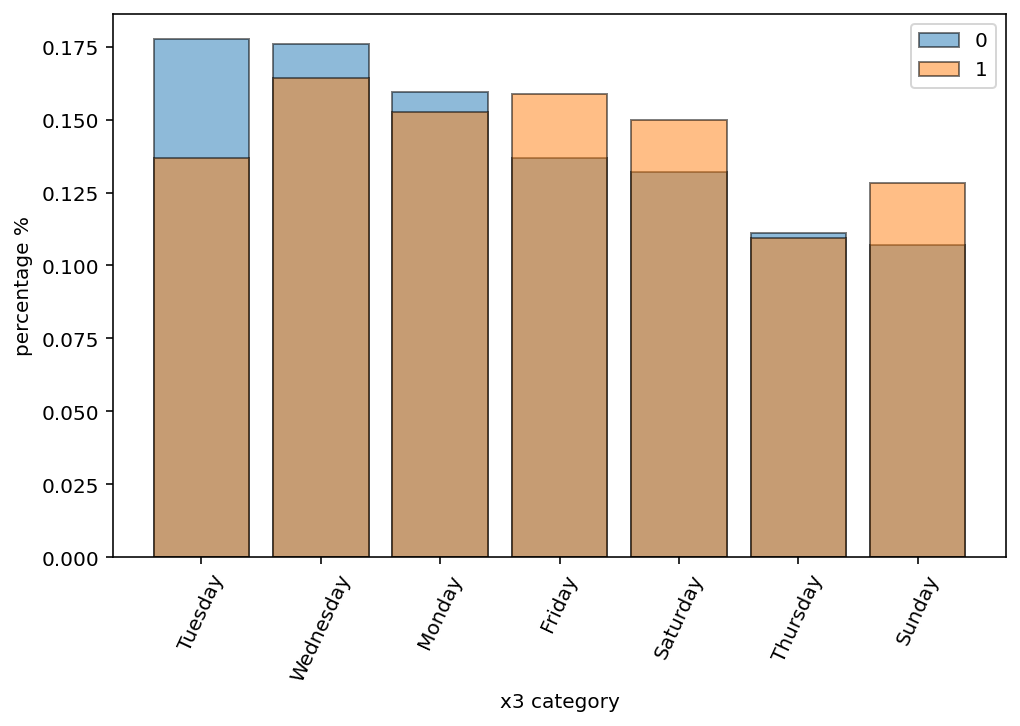

In [28]:
plot_bars(df_categ, col_name='x3', fig_number=1, figsiz=(8,5))

the first three days the chance of having 0 is higher. compare to the rest of the week that the chance of 1 is higher.

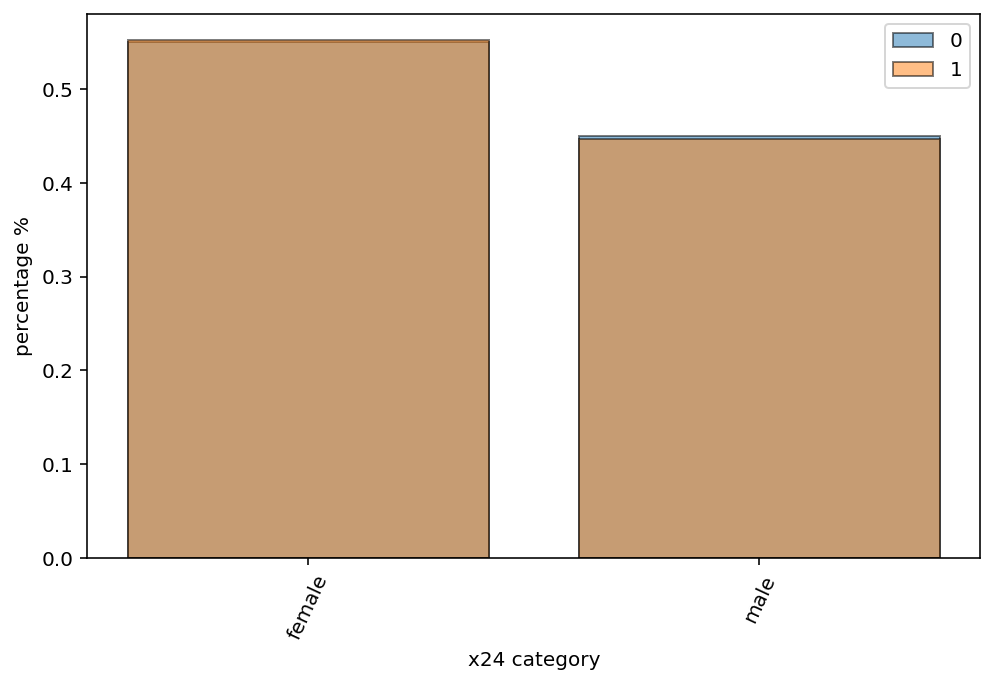

In [29]:
plot_bars(df_categ, col_name='x24', fig_number=2, figsiz=(8,5))

no difference between female and male is observed.

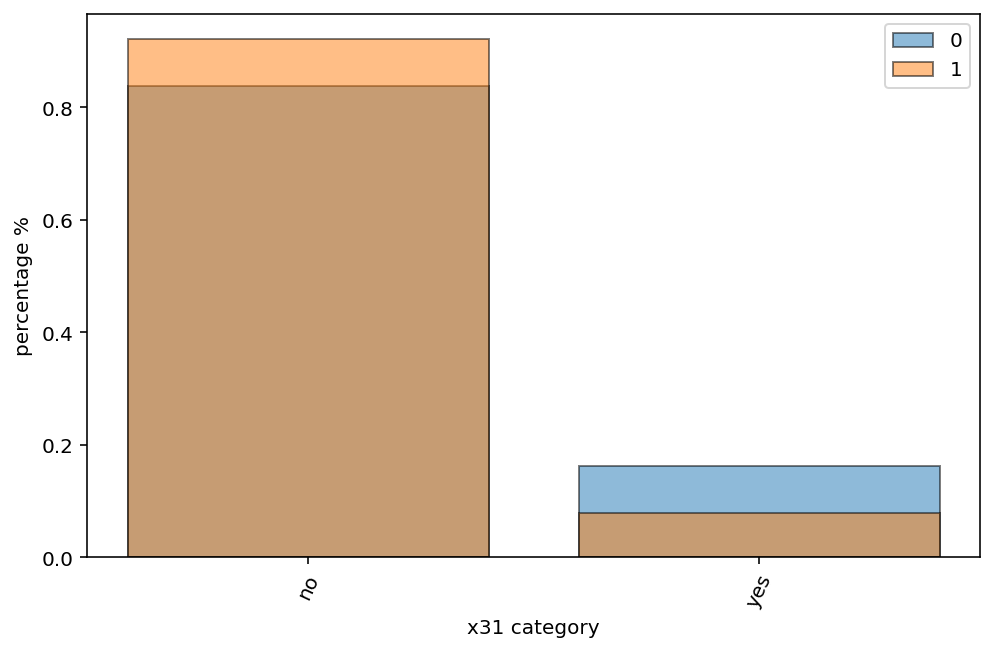

In [30]:
plot_bars(df_categ, col_name='x31', fig_number=3, figsiz=(8,5))

if the x31 value is no, it is higher chance for getting 1 as target. 

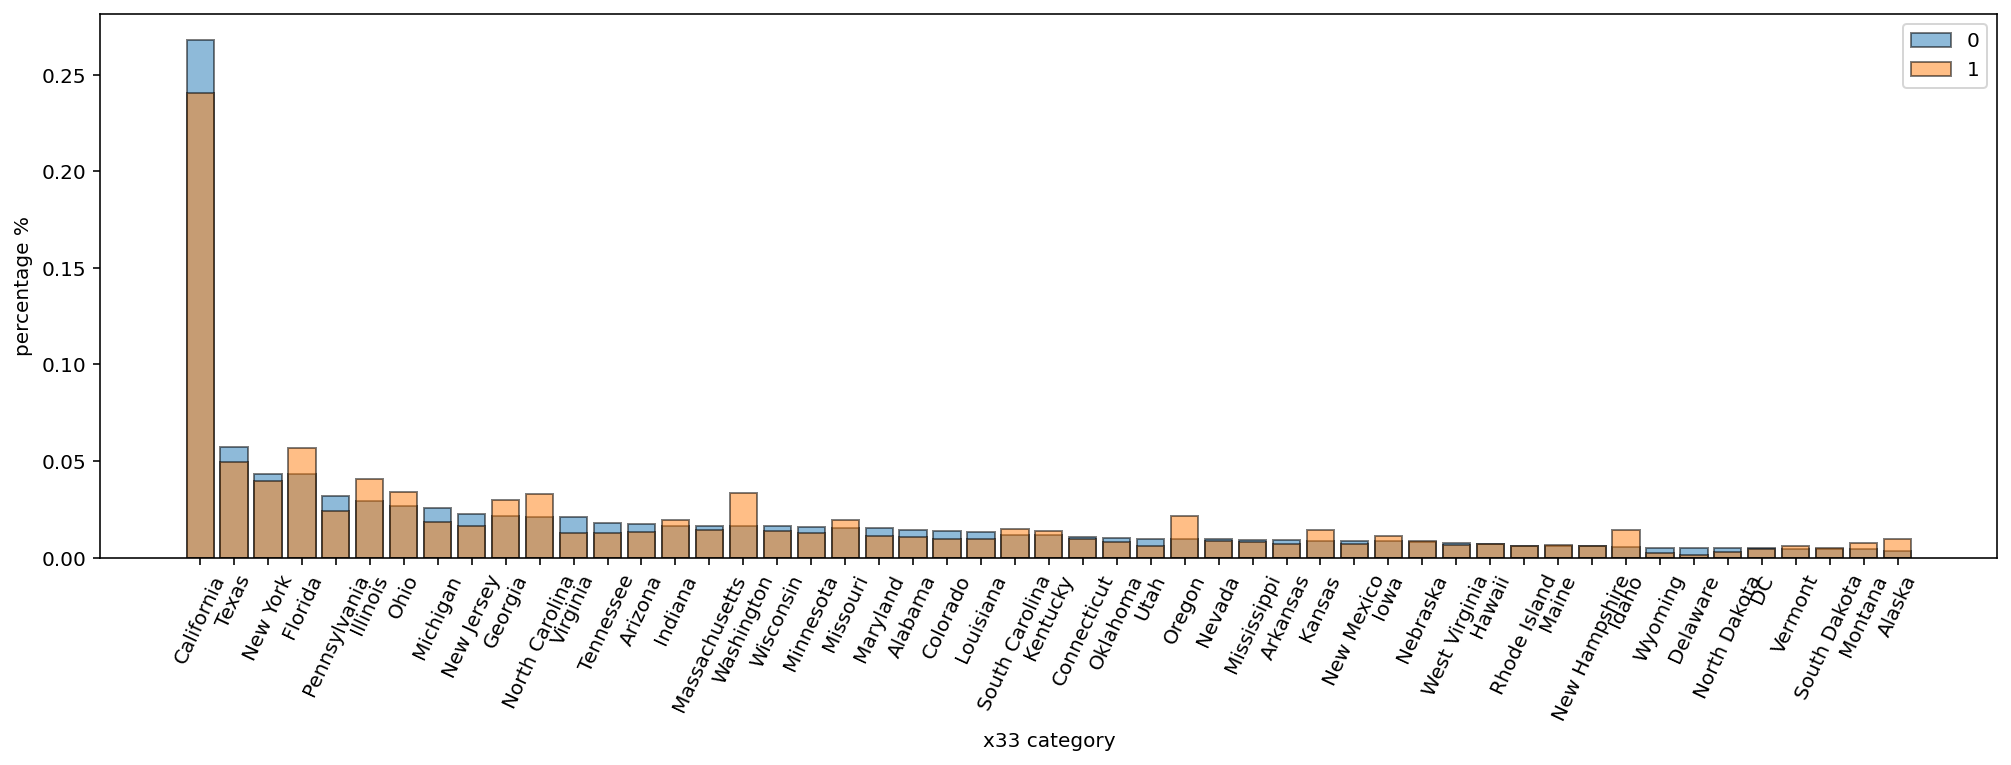

In [31]:
plot_bars(df_categ, col_name='x33', 
          fig_number=4, figsiz=(17,5))

california and texas have more 0 number compare to 1. so if x33 is texas, there is higher chance to get 0 as target value.

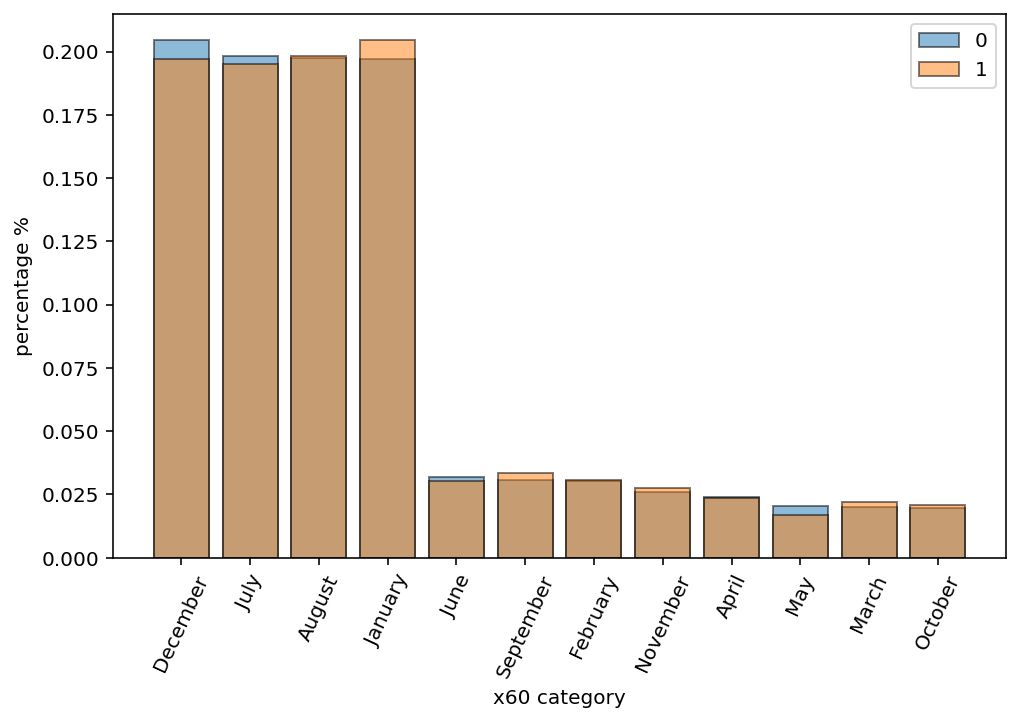

In [32]:
plot_bars(df_categ, col_name='x60', fig_number=5, figsiz=(8,5))

the chance for getting 0 as target is higher in december.

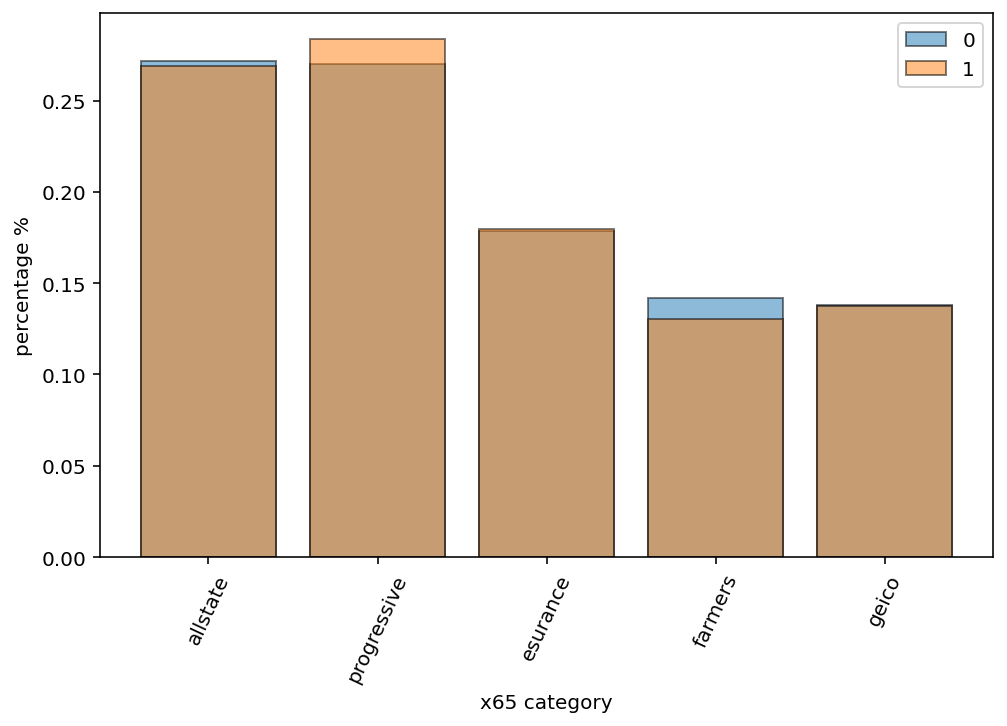

In [33]:
plot_bars(df_categ, col_name='x65', fig_number=6, figsiz=(8,5))

when the x65 category is farmers, the chance of getting 0 is higher. for the rest, I don't see any difference.

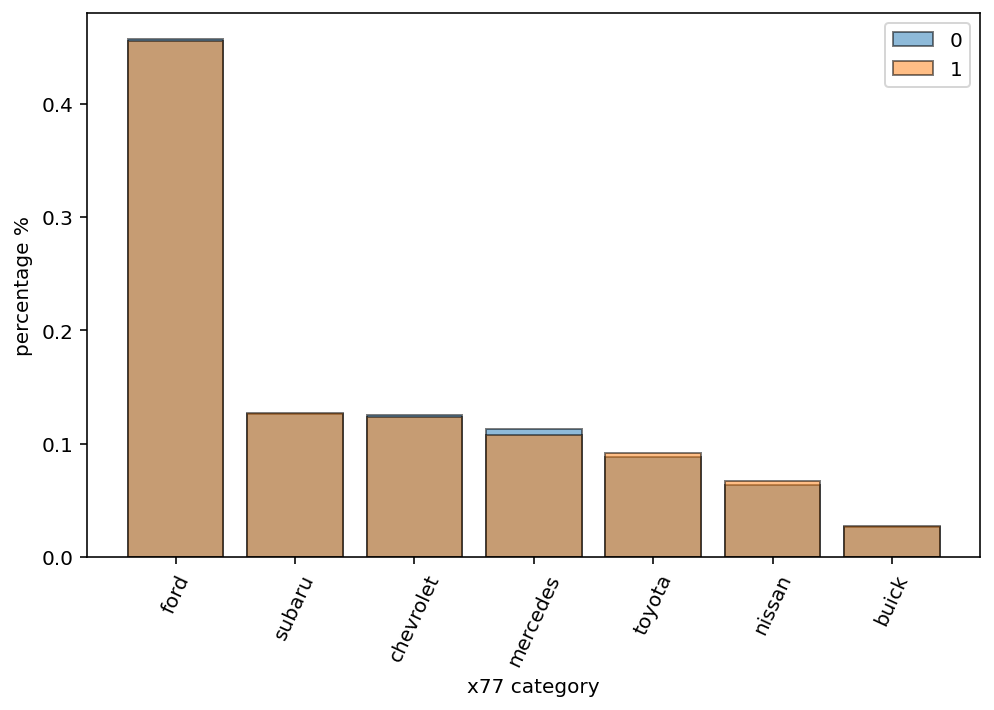

In [34]:
plot_bars(df_categ, col_name='x77', fig_number=6, figsiz=(8,5))

Mercedes has a slightly higher chance to get 0 as target value.

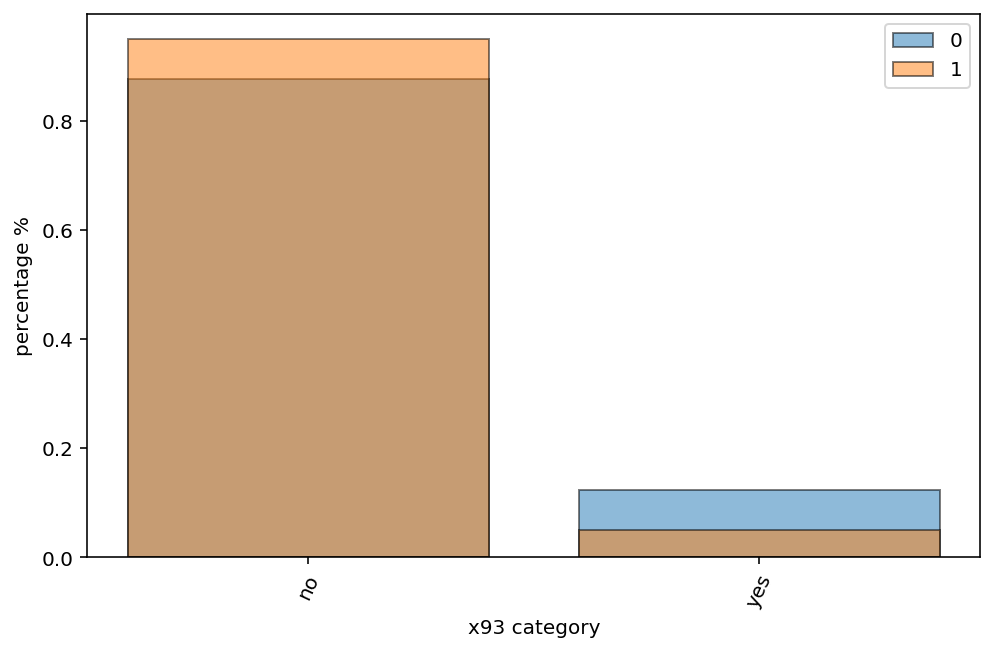

In [35]:
plot_bars(df_categ, col_name='x93', fig_number=6, figsiz=(8,5))

clearly there is difference between yes and no in column x93. 

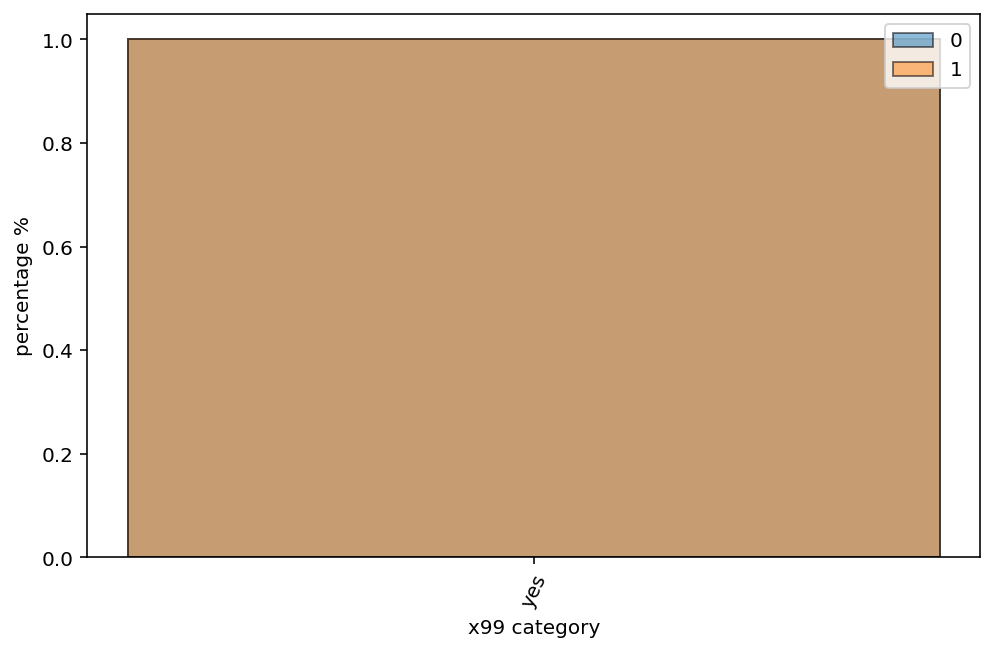

In [36]:
plot_bars(df_categ, col_name='x99', fig_number=6, figsiz=(8,5))

no difference is observed. this is a feature with 0 variance and should be dropped for final modeling.

# Numerical features

checking out the distribution of numerical features

In [37]:
df.dtypes.value_counts()

float64    86
object     12
int64       3
dtype: int64

In [38]:
# df_numerics = df
df_numerics = df.select_dtypes(include=['float64','int64'])

In [39]:
# impute the feaures using mean value
df_numerics[df_numerics.columns] = df_numerics[df_numerics.columns].\
                fillna(df_numerics[df_numerics.columns].mean().iloc[0])

In [40]:
df_numerics.columns

Index(['y', 'x1', 'x2', 'x4', 'x5', 'x6', 'x8', 'x9', 'x10', 'x11', 'x12',
       'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x20', 'x21', 'x22', 'x23',
       'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x32', 'x34', 'x35', 'x36',
       'x37', 'x38', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47',
       'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57',
       'x58', 'x59', 'x61', 'x62', 'x63', 'x64', 'x66', 'x67', 'x68', 'x69',
       'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x78', 'x79', 'x80',
       'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90',
       'x91', 'x92', 'x94', 'x95', 'x96', 'x97', 'x98', 'x100'],
      dtype='object')

In [41]:
df_numerics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 89 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       40000 non-null  int64  
 1   x1      40000 non-null  float64
 2   x2      40000 non-null  float64
 3   x4      40000 non-null  float64
 4   x5      40000 non-null  float64
 5   x6      40000 non-null  float64
 6   x8      40000 non-null  float64
 7   x9      40000 non-null  float64
 8   x10     40000 non-null  float64
 9   x11     40000 non-null  float64
 10  x12     40000 non-null  float64
 11  x13     40000 non-null  float64
 12  x14     40000 non-null  float64
 13  x15     40000 non-null  float64
 14  x16     40000 non-null  float64
 15  x17     40000 non-null  float64
 16  x18     40000 non-null  float64
 17  x20     40000 non-null  float64
 18  x21     40000 non-null  float64
 19  x22     40000 non-null  float64
 20  x23     40000 non-null  float64
 21  x25     40000 non-null  float64
 22

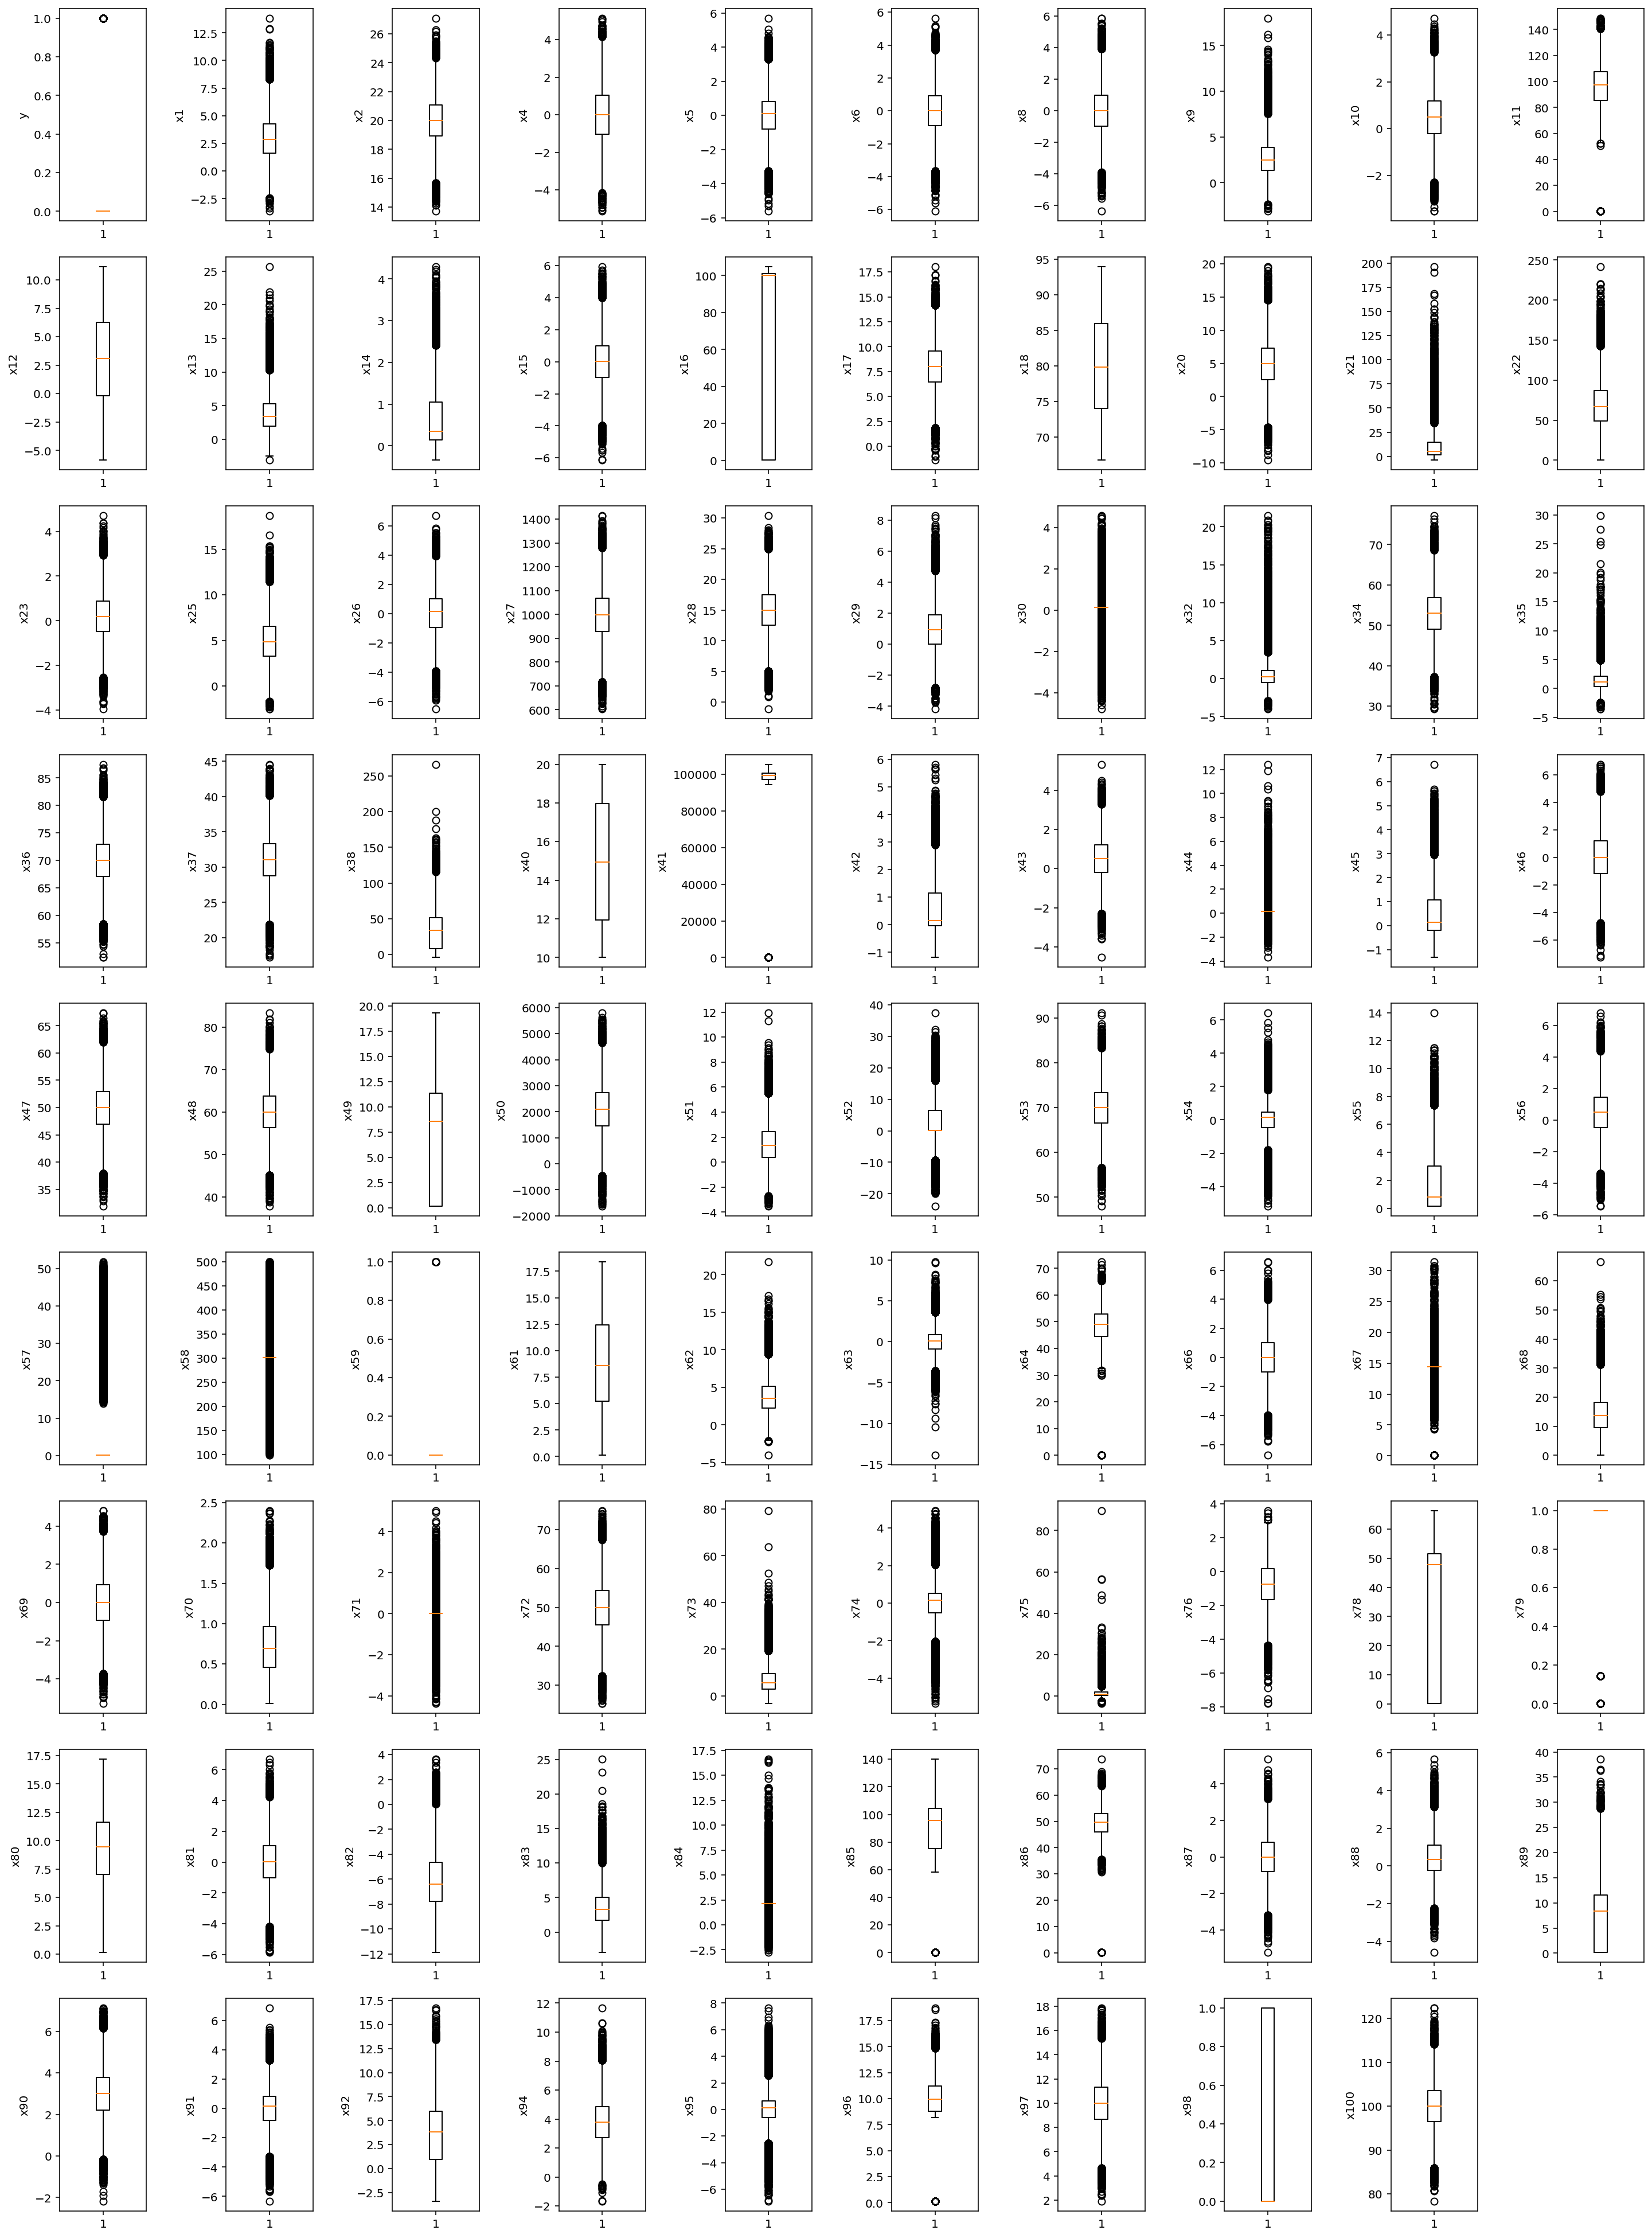

In [42]:
plt.figure(figsize=(20,30))
for i, col in enumerate(df_numerics.columns):
    
    if i < 100:
        
        plt.subplot(10,10,i+1)
        plt.ylabel(col)
        plt.boxplot(df_numerics[col], vert=True)
    else:
        break
        
        
plt.tight_layout()
plt.savefig("../Figures/plot_01_1_outlier.png")

plt.show()

In [43]:
numeric_features = df_numerics.drop(['y'],axis=1)
# numeric_features.columns

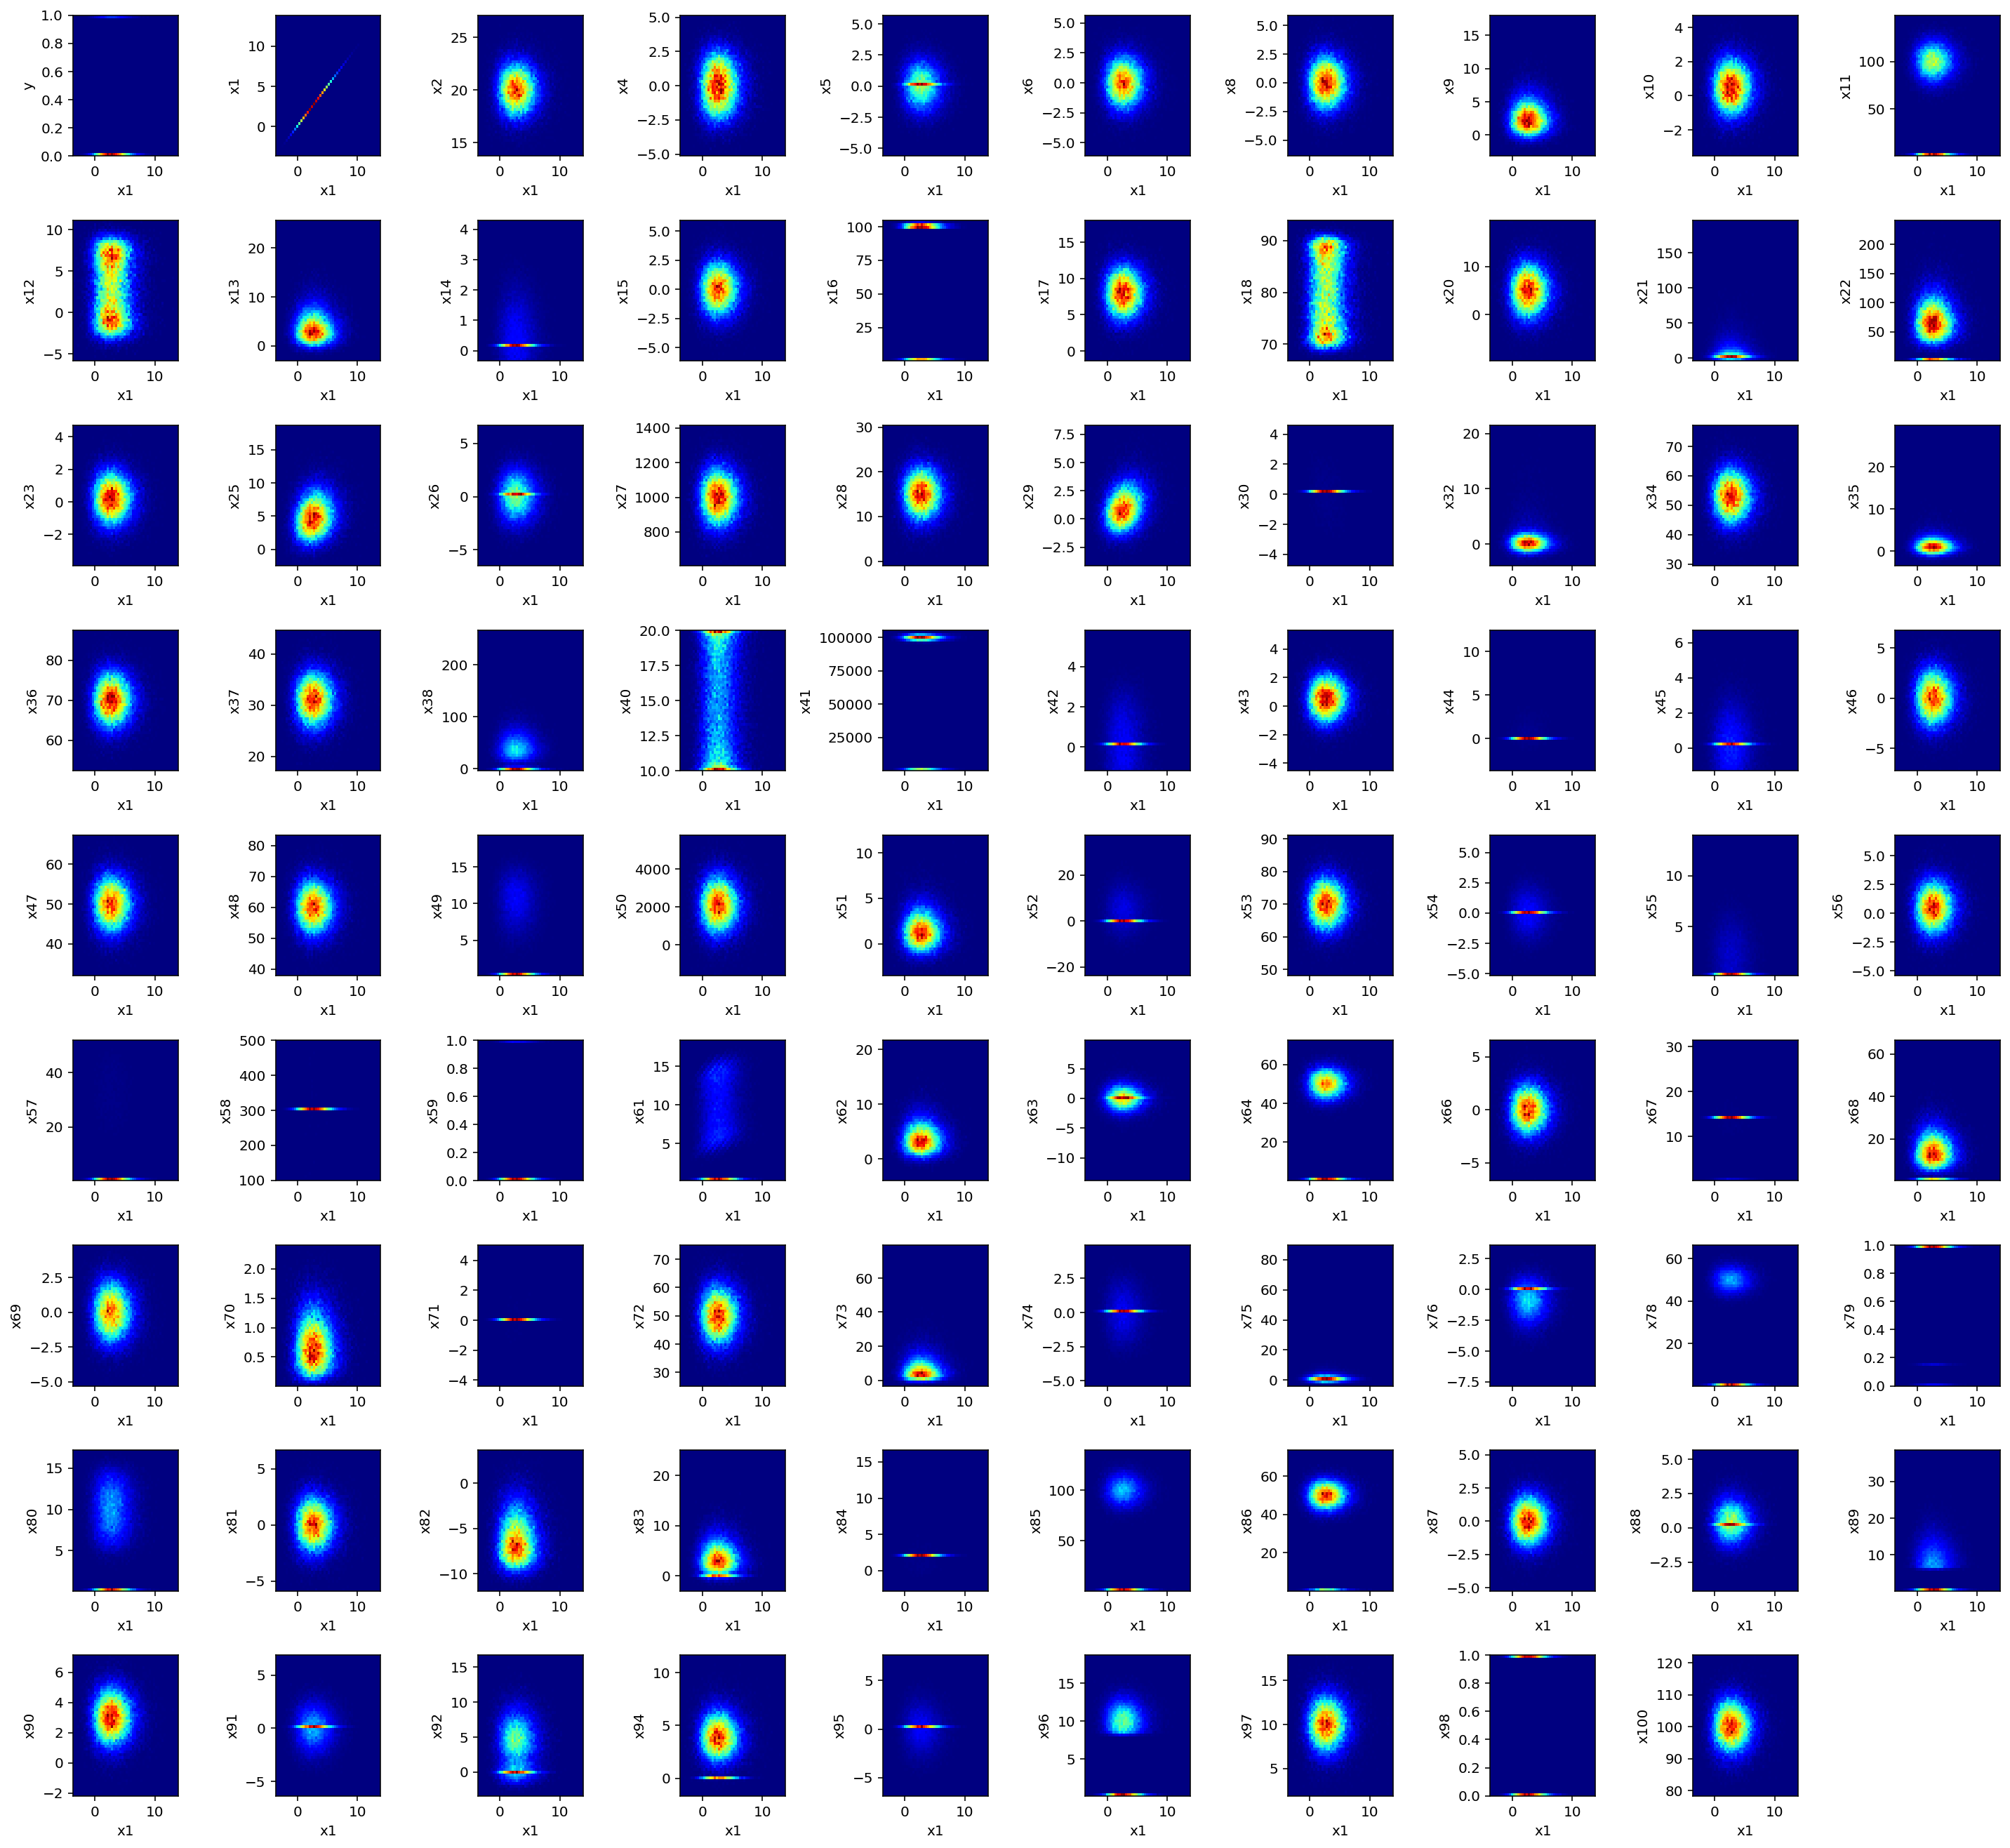

In [44]:
plt.figure(figsize=(20,20))
for i, col in enumerate(df_numerics.columns):
    
    if i < 100:
        
        plt.subplot(10,10,i+1)
        plt.hist2d(df_numerics['x1'], 
           df_numerics[col], 
           cmap=plt.cm.jet, 
           bins=(50, 50))
        plt.xlabel('x1')
        plt.ylabel(col)
        
    else:
        break
        
        
plt.tight_layout()
plt.savefig("../Figures/plot_01_1_hist2d.png")

plt.show()

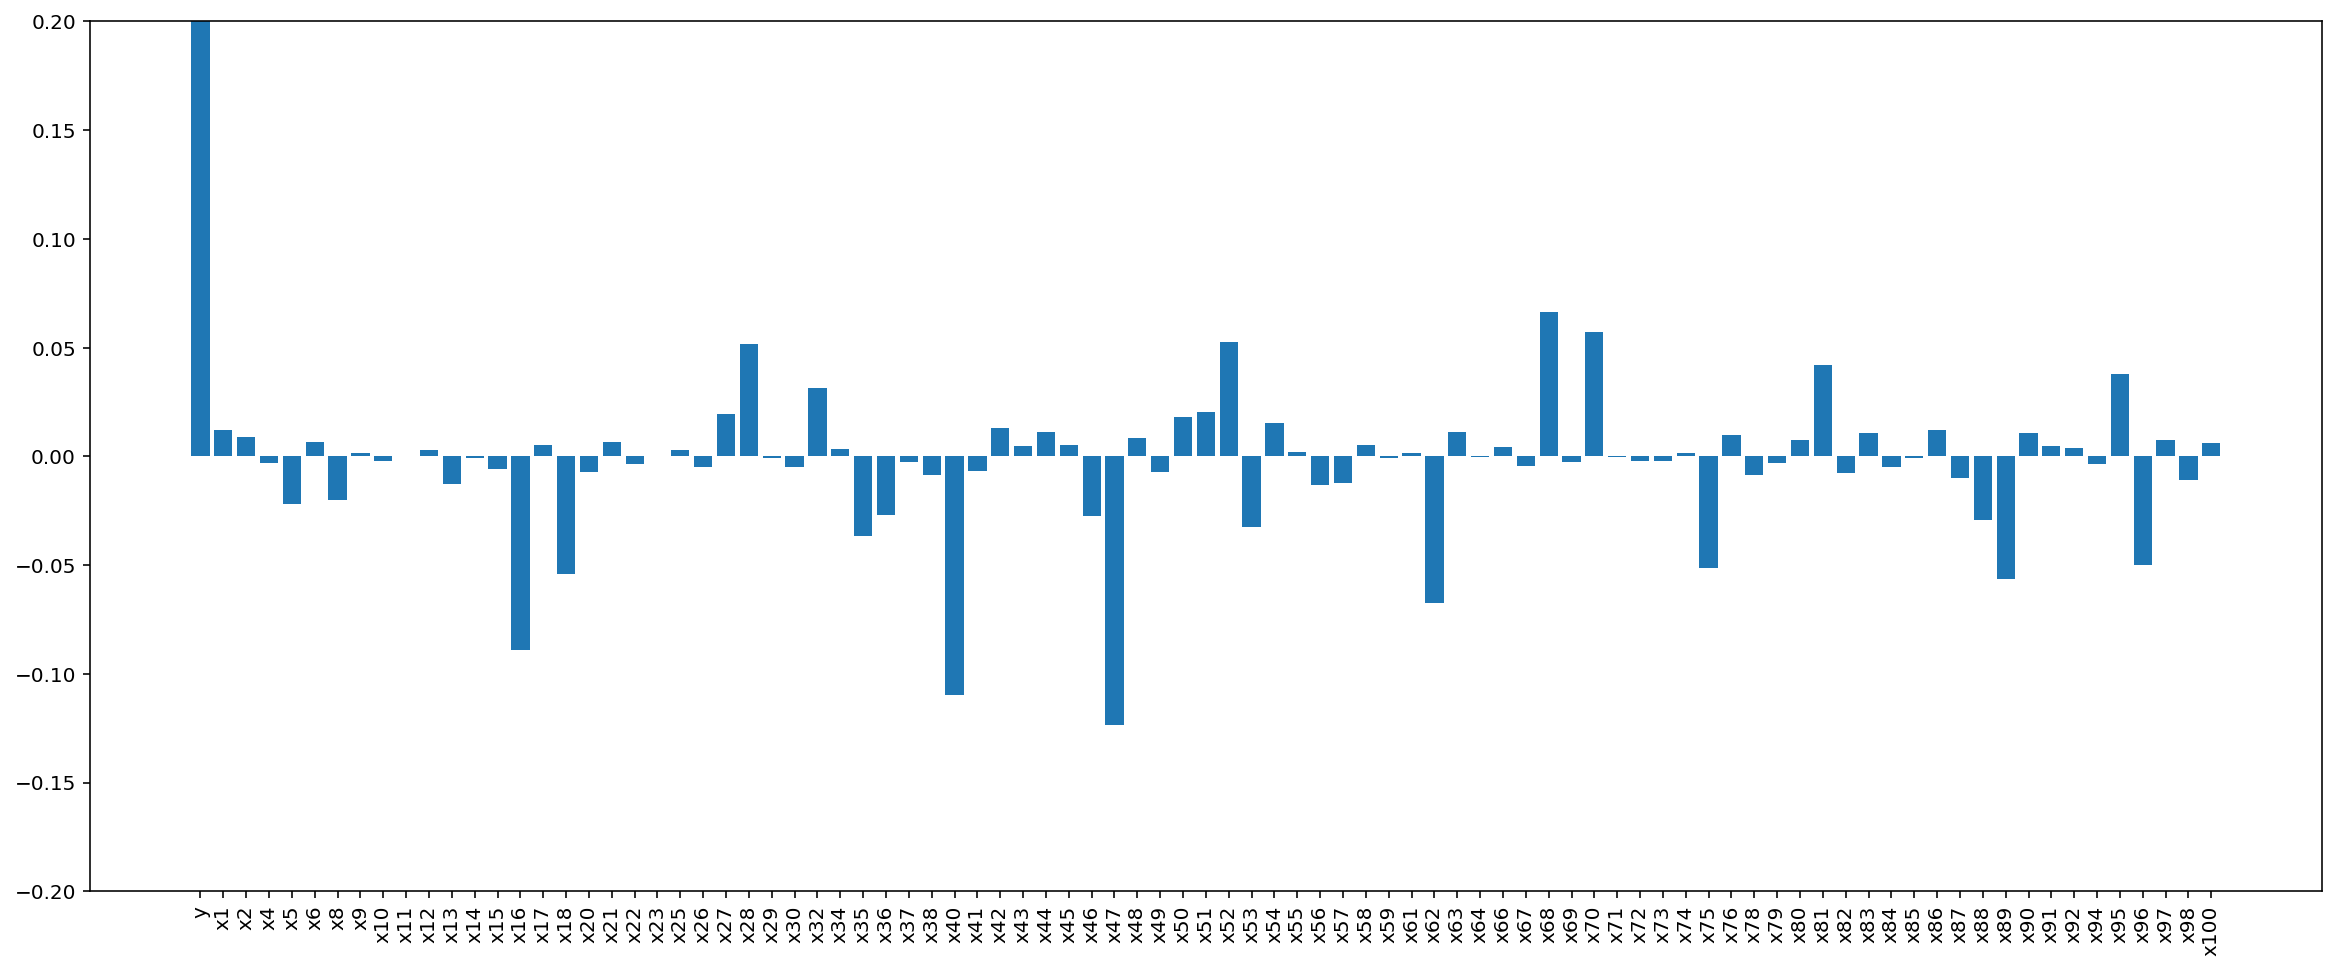

In [45]:
plt.figure(figsize=(20,8))
plt.bar(x=df_numerics.columns, 
        height=df_numerics.corr().T['y'])
plt.xticks(rotation=90)
plt.ylim(-0.2,.2)
plt.savefig("../Figures/plot_01_1_corrbar.png")

plt.show()

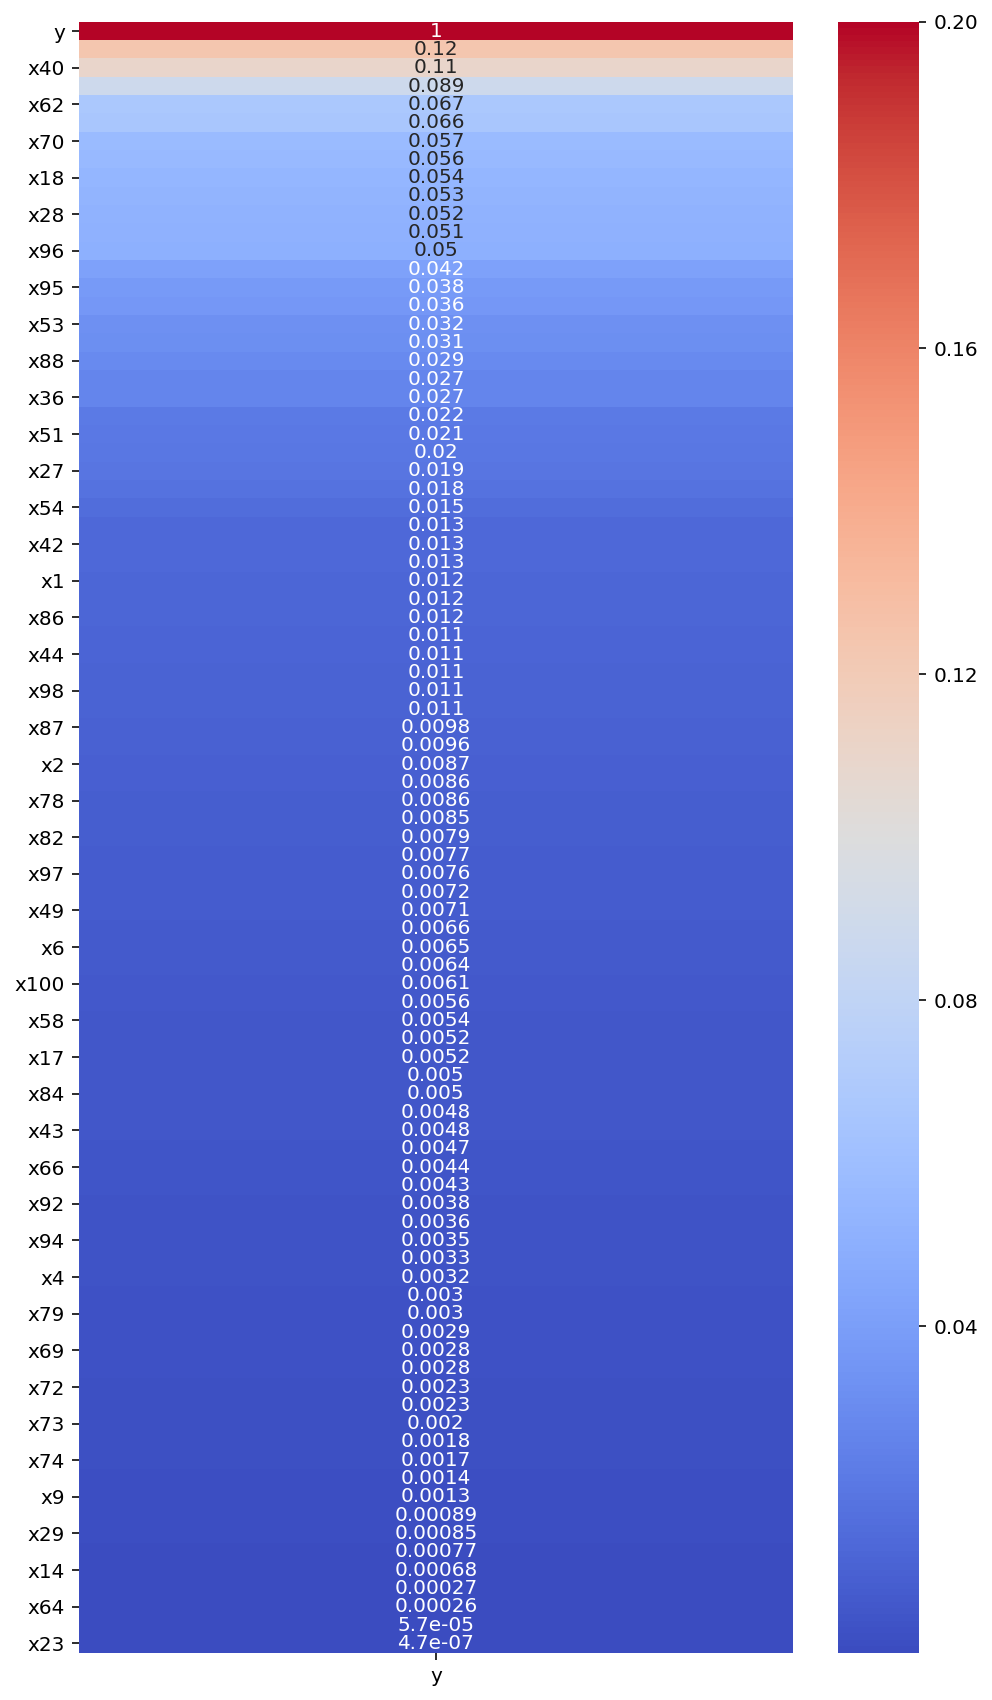

In [46]:
df_numerics_corr = abs(df_numerics.corr())
plt.figure(figsize=(8,15))
sns.heatmap(df_numerics_corr[['y']].sort_values(by=['y'],
                                                ascending=False),
#             vmin=-1,
            vmax=0.2,
            cmap='coolwarm',
            annot=True);
plt.savefig("../Figures/plot_01_1_corr.png")


clearly there is a poor relationship between target and featues in data set.

selecting top 20 features

In [47]:
df_numerics_corr[['y']].sort_values(by=['y'],ascending=False)[0:20].index

Index(['y', 'x47', 'x40', 'x16', 'x62', 'x68', 'x70', 'x89', 'x18', 'x52',
       'x28', 'x75', 'x96', 'x81', 'x95', 'x35', 'x53', 'x32', 'x88', 'x46'],
      dtype='object')

In [48]:
top_20_numeric_features = df_numerics_corr[['y']].sort_values(by=['y'],ascending=False)[0:20].index

# Outliers

check out the outliers

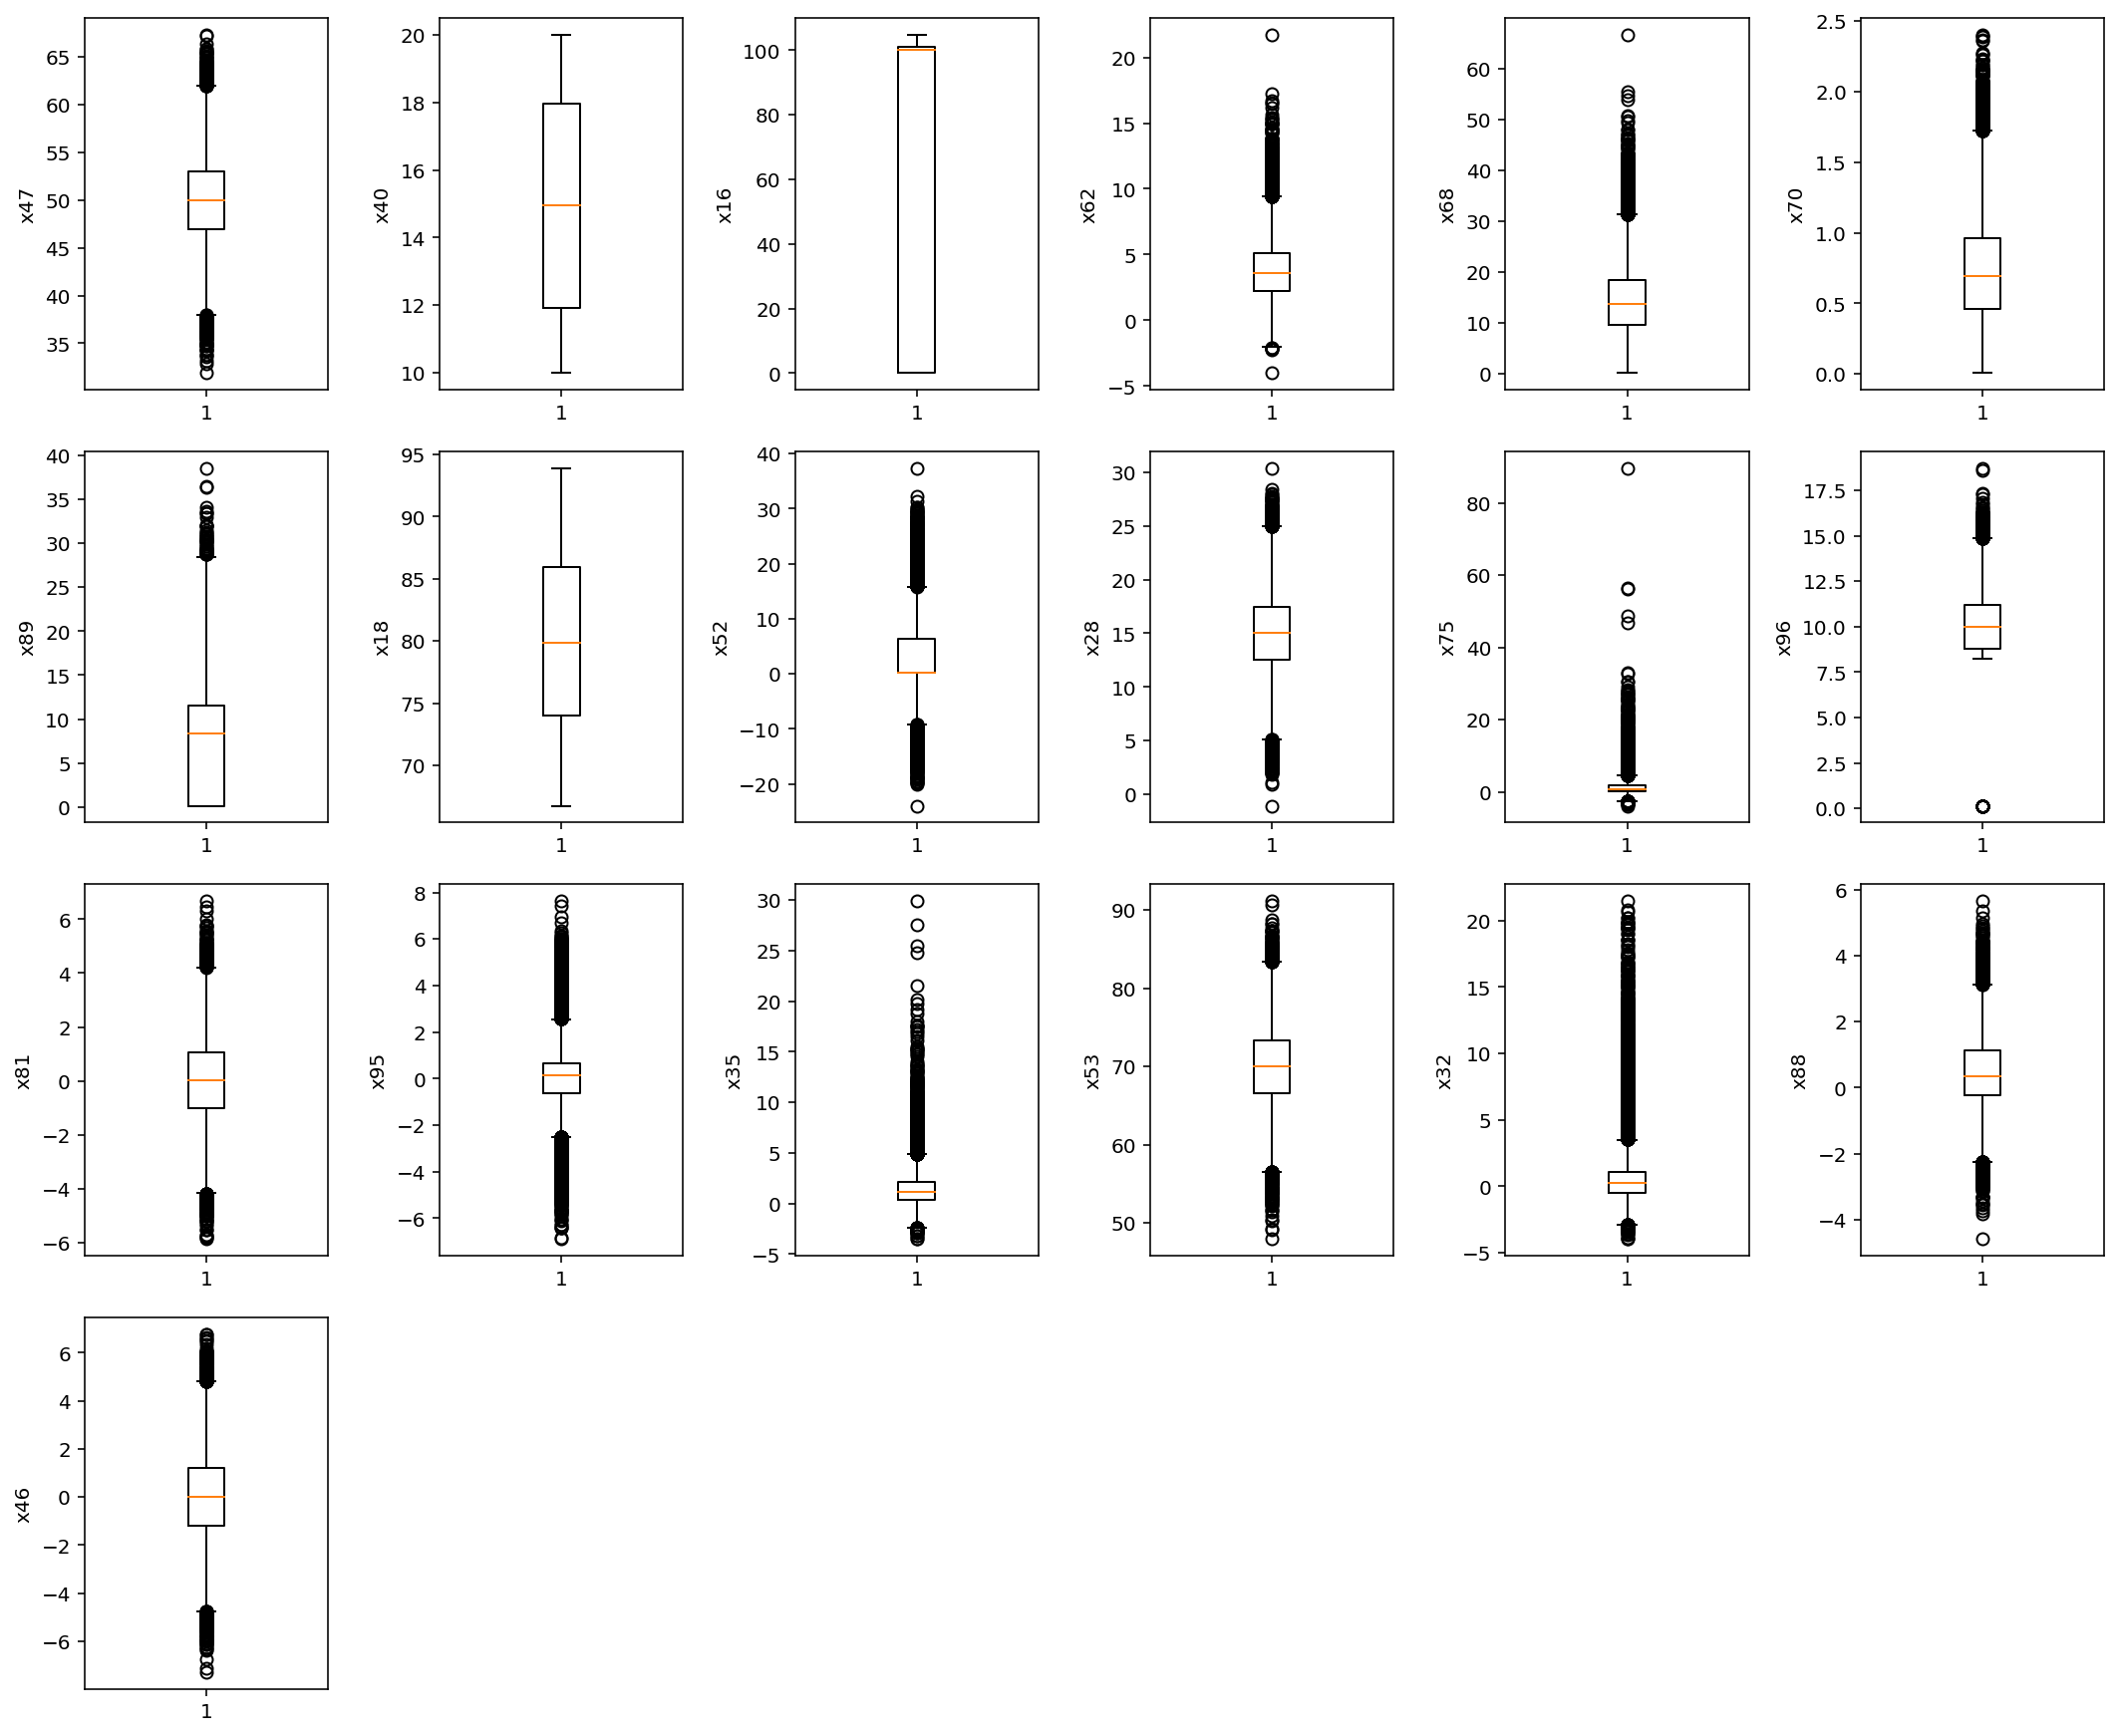

In [49]:
plt.figure(figsize=(15,15))
for i, col in enumerate([ 'x47', 'x40', 'x16', 'x62', 'x68', 'x70', 'x89', 'x18', 'x52',
       'x28', 'x75', 'x96', 'x81', 'x95', 'x35', 'x53', 'x32', 'x88', 'x46']):
    
    if i < 100:
        
        plt.subplot(5,6,i+1)
        plt.ylabel(col)
        plt.boxplot(df_numerics[col], vert=True)
    else:
        break
        
        
plt.tight_layout()
plt.savefig("../Figures/plot_01_1_boxplot_outlier20top.png")

plt.show()

In [50]:
from numpy import percentile

In [51]:
for col in ['x47', 'x40', 'x16', 'x62', 'x68', 'x70', 'x89', 'x18', 'x52',
       'x28', 'x75', 'x96', 'x81', 'x95', 'x35', 'x53', 'x32', 'x88', 'x46']:
    
    

    # calculate interquartile range
    q25, q75 = percentile(df_numerics[col], 25), percentile(df_numerics[col], 75)
    iqr = q75 - q25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = [x for x in df_numerics[col] if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))

    # remove outliers
    outliers_removed = [x for x in df_numerics[col] if x >= lower and x <= upper]
    print('Non-outlier observations: %d' % len(outliers_removed))
    print('\n')

Percentiles: 25th=46.961, 75th=52.977, IQR=6.015
Identified outliers: 273
Non-outlier observations: 39727


Percentiles: 25th=11.929, 75th=17.974, IQR=6.044
Identified outliers: 0
Non-outlier observations: 40000


Percentiles: 25th=0.145, 75th=101.017, IQR=100.872
Identified outliers: 0
Non-outlier observations: 40000


Percentiles: 25th=2.251, 75th=5.118, IQR=2.867
Identified outliers: 782
Non-outlier observations: 39218


Percentiles: 25th=9.599, 75th=18.269, IQR=8.670
Identified outliers: 640
Non-outlier observations: 39360


Percentiles: 25th=0.458, 75th=0.965, IQR=0.507
Identified outliers: 396
Non-outlier observations: 39604


Percentiles: 25th=0.145, 75th=11.517, IQR=11.372
Identified outliers: 43
Non-outlier observations: 39957


Percentiles: 25th=74.015, 75th=85.908, IQR=11.892
Identified outliers: 0
Non-outlier observations: 40000


Percentiles: 25th=0.145, 75th=6.429, IQR=6.284
Identified outliers: 2167
Non-outlier observations: 37833


Percentiles: 25th=12.534, 75th=17.501,

hist plot for top 20 features

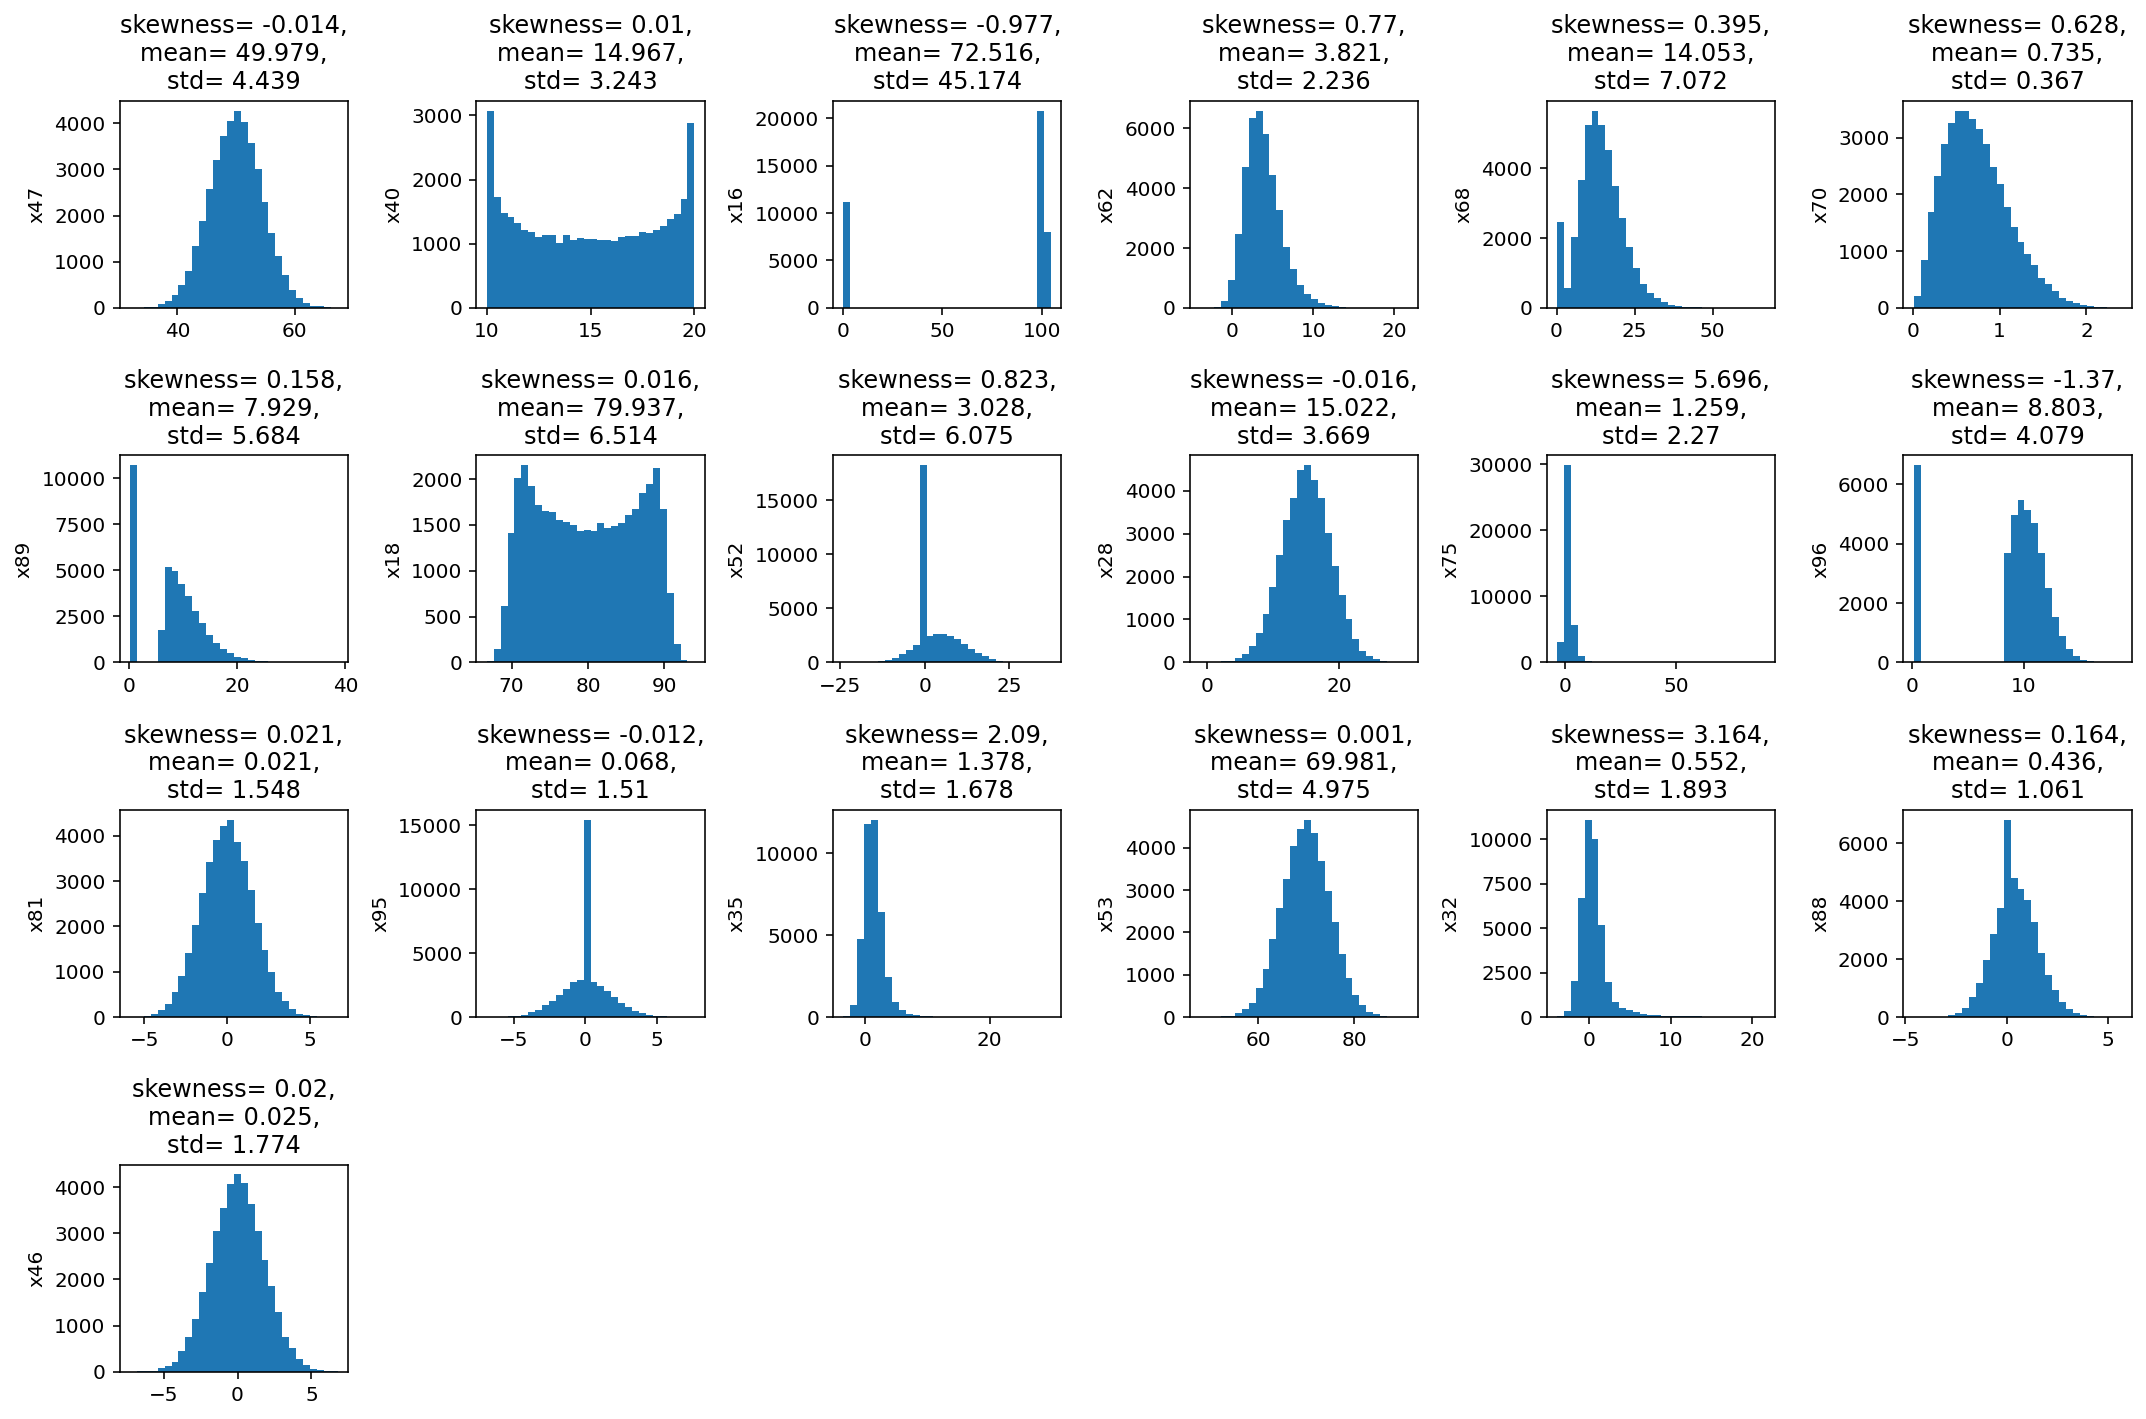

In [52]:
plt.figure(figsize=(15,10))
for i, col in enumerate(['x47', 'x40', 'x16', 'x62', 'x68', 'x70', 'x89', 'x18', 'x52',
       'x28', 'x75', 'x96', 'x81', 'x95', 'x35', 'x53', 'x32', 'x88', 'x46']):
    
    if i < 100:
        
        plt.subplot(4,6,i+1)
        plt.ylabel(col)
        plt.hist(df_numerics[col], bins=30)

        plt.title(f'skewness= {round(df_numerics[col].skew(),3)},\nmean= {round(df_numerics[col].mean(),3)},\nstd= {round(df_numerics[col].std(),3)}')

    else:
        break
        
        
plt.tight_layout()
plt.savefig("../Figures/plot_01_1_hist20top.png")

plt.show()

separate the features based on labels

In [53]:
sub_1_mask = df_numerics["y"] == 1
sub_0_mask = df_numerics["y"] == 0

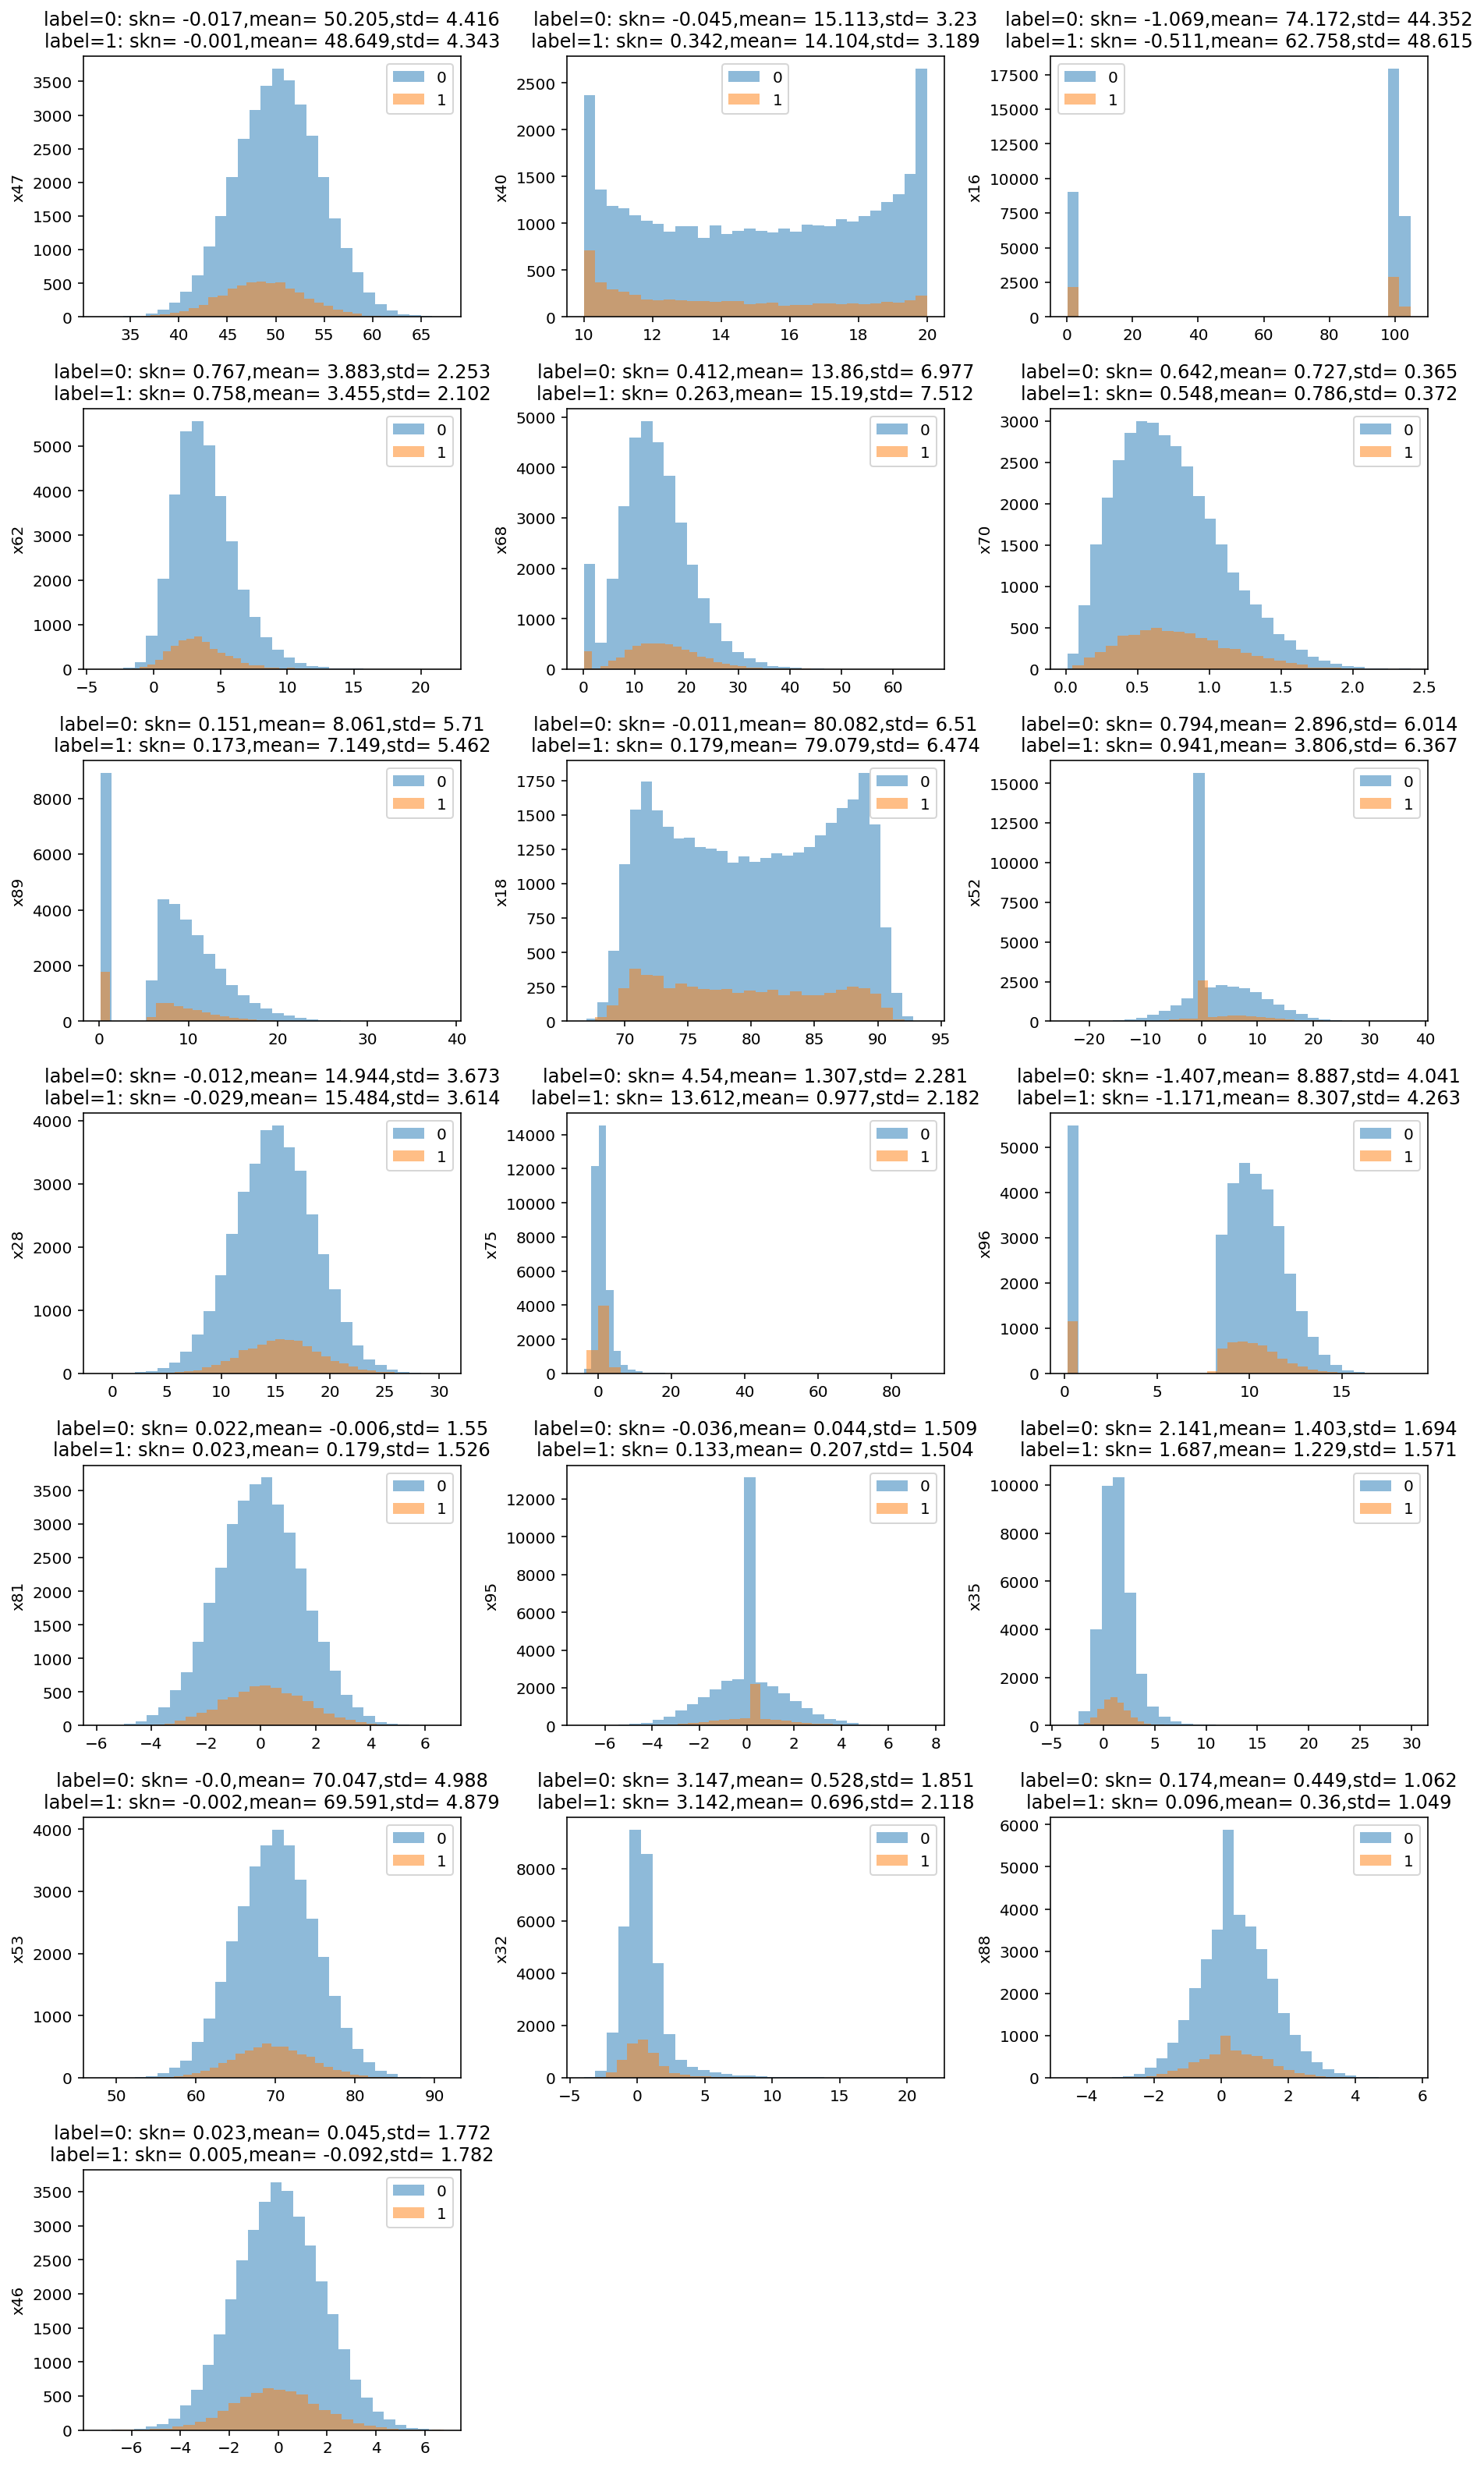

In [54]:
plt.figure(figsize=(13,25))
for i, col in enumerate(['x47', 'x40', 'x16', 'x62', 'x68', 'x70', 'x89', 'x18', 'x52',
                       'x28', 'x75', 'x96', 'x81', 'x95', 'x35', 'x53', 'x32', 'x88', 'x46']):
    
    if i < 100:
        
        plt.subplot(8,3,i+1)
        plt.ylabel(col)
        plt.hist(df_numerics[sub_0_mask][col], 
                 bins=30, 
#                  color='r',
                 alpha=0.5,label='0', log=False)
        plt.hist(df_numerics[sub_1_mask][col], 
                 bins=30, 
#                  color='b',
                 alpha=0.5,label='1', log=False)
        plt.legend()
        plt.title(f'label=0: skn= {round(df_numerics[sub_0_mask][col].skew(),3)},mean= {round(df_numerics[sub_0_mask][col].mean(),3)},std= {round(df_numerics[sub_0_mask][col].std(),3)}\nlabel=1: skn= {round(df_numerics[sub_1_mask][col].skew(),3)},mean= {round(df_numerics[sub_1_mask][col].mean(),3)},std= {round(df_numerics[sub_1_mask][col].std(),3)}')

    else:
        break
        
        
plt.tight_layout()
plt.savefig("../Figures/plot_01_1_hist20top2cls.png")

plt.show()

In [55]:
from imblearn.pipeline import Pipeline

use top 20 features and lr model to performance initial evaluation

In [56]:
# rest on nemeric feature pipe
top_20_features_pipe = Pipeline([('imp',SimpleImputer(strategy="mean")), 
                               ('scaler',StandardScaler()),
                               ('p_tf',PowerTransformer()),
                                     ])



preprocessor = make_column_transformer((top_20_features_pipe, 
                                        ['x47', 'x40', 'x16', 'x62', 'x68', 'x70', 'x89', 'x18', 'x52',
                       'x28', 'x75', 'x96', 'x81', 'x95', 'x35', 'x53', 'x32', 'x88', 'x46']))

preprocessor.fit_transform(df)[0]

array([ 0.76052553,  0.97514058,  1.29240785,  1.21674877,  0.20113486,
       -0.44914114,  0.15809134, -0.33625636,  0.47307933, -0.06899902,
        0.25600642, -0.09501282, -0.31492535,  0.00699552,  1.12600949,
        0.43973339, -0.68519579,  0.60244223,  0.12198834])

In [57]:
len(preprocessor.fit_transform(df)[0])

19

In [58]:
preprocessor.named_transformers_

{'pipeline': Pipeline(steps=[('imp', SimpleImputer()), ('scaler', StandardScaler()),
                 ('p_tf', PowerTransformer())]), 'remainder': 'drop'}

In [59]:
X_all_features = df.drop(columns=['y'], 
                         axis=1)

y = df['y']

In [60]:
weights = {0:0.85, 1:0.14}
logreg = LogisticRegression(solver='sag', 
                            class_weight=weights)

In [61]:
Final_pipe_lr = Pipeline(steps=[('preprocessor', 
                                 preprocessor),
                                ('classiffier', 
                                 logreg)])

In [62]:
cross_val_score(Final_pipe_lr, X_all_features, y, cv=5, scoring='roc_auc', n_jobs=-1).mean()

0.6409526394324399

In [63]:
Final_pipe_lr.fit(X_all_features,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('p_tf',
                                                                   PowerTransformer())]),
                                                  ['x47', 'x40', 'x16', 'x62',
                                                   'x68', 'x70', 'x89', 'x18',
                                                   'x52', 'x28', 'x75', 'x96',
                                                   'x81', 'x95', 'x35', 'x53',
                                                   'x32', 'x88', 'x46'])])),
                ('classif

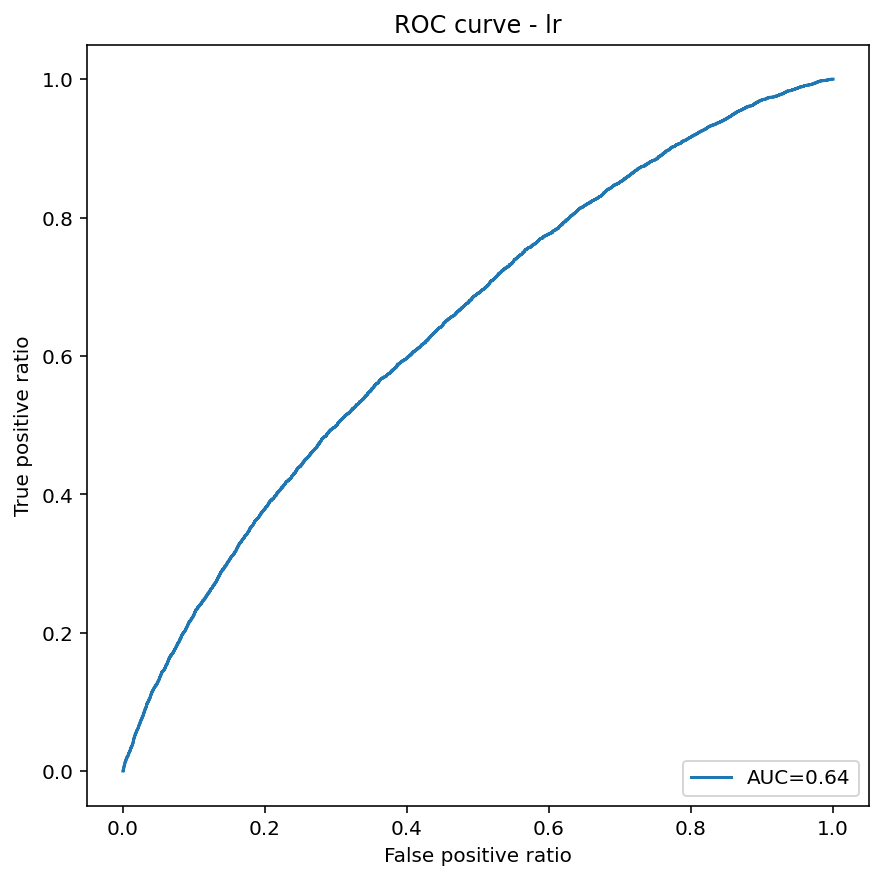

In [64]:
y_pred = Final_pipe_lr.predict(X_all_features)
y_prob = Final_pipe_lr.predict_proba(X_all_features)

plt.figure(figsize=(7,7))
# https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
fpr_lr, tpr_lr, _ = metrics.roc_curve(y,  y_prob[:,1])
auc_lr = metrics.roc_auc_score(y, y_prob[:,1])
plt.plot(fpr_lr,tpr_lr, label="AUC="+str(round(auc_lr,2)))
plt.legend(loc=4)
plt.xlabel('False positive ratio')
plt.ylabel('True positive ratio')
plt.title('ROC curve - lr')
plt.savefig("../Figures/plot_01_1_roc_lr.png")
plt.show()

let's try a tree based model here

In [65]:
Final_pipe_GB = Pipeline(steps=[('preprocessor', 
                                 preprocessor),
                                ('classiffier', 
                                 GradientBoostingClassifier(n_estimators=100, 
                                                            learning_rate=0.1,
                                                            max_depth=3, 
                                                            random_state=0))])

cross_val_score(Final_pipe_GB, X_all_features, y, cv=5, scoring='roc_auc', n_jobs=-1).mean()

0.6371435215983731

In [66]:
Final_pipe_GB.fit(X_all_features,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('p_tf',
                                                                   PowerTransformer())]),
                                                  ['x47', 'x40', 'x16', 'x62',
                                                   'x68', 'x70', 'x89', 'x18',
                                                   'x52', 'x28', 'x75', 'x96',
                                                   'x81', 'x95', 'x35', 'x53',
                                                   'x32', 'x88', 'x46'])])),
                ('classif

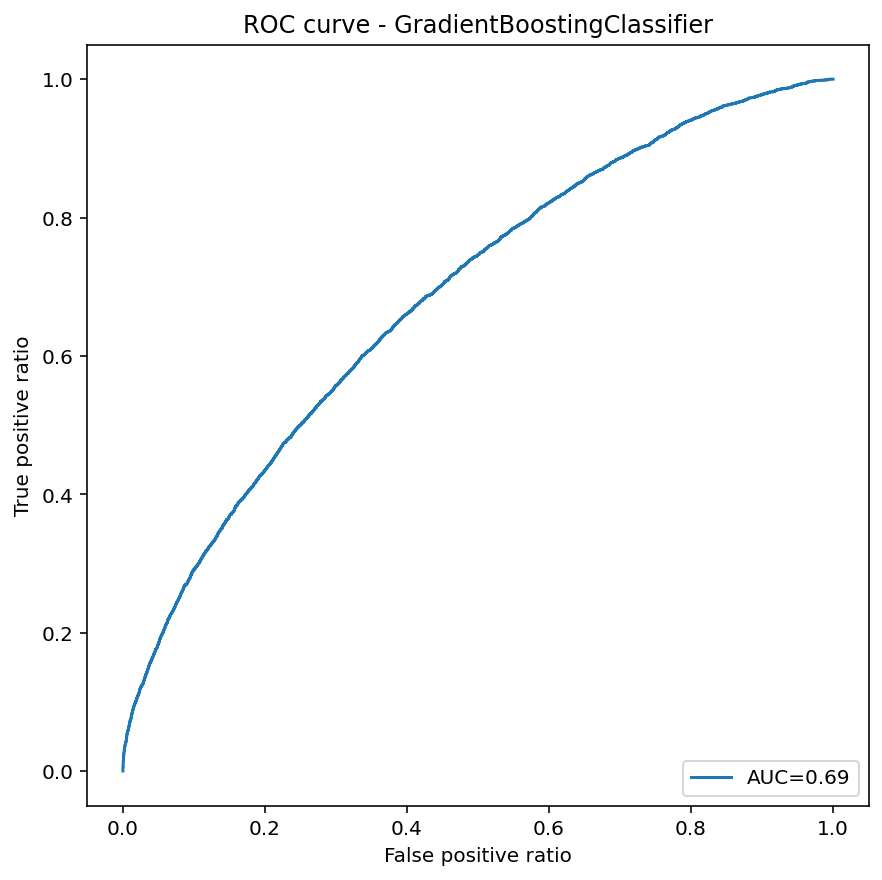

In [67]:
y_pred = Final_pipe_GB.predict(X_all_features)
y_prob = Final_pipe_GB.predict_proba(X_all_features)

plt.figure(figsize=(7,7))
# https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
fpr_gb, tpr_gb, _ = metrics.roc_curve(y,  y_prob[:,1])
auc_gb = metrics.roc_auc_score(y, y_prob[:,1])
plt.plot(fpr_gb,tpr_gb, label="AUC="+str(round(auc_gb,2)))
plt.legend(loc=4)
plt.xlabel('False positive ratio')
plt.ylabel('True positive ratio')
plt.title('ROC curve - GradientBoostingClassifier')
plt.savefig("../Figures/plot_01_1_roc_GB.png")
plt.show()

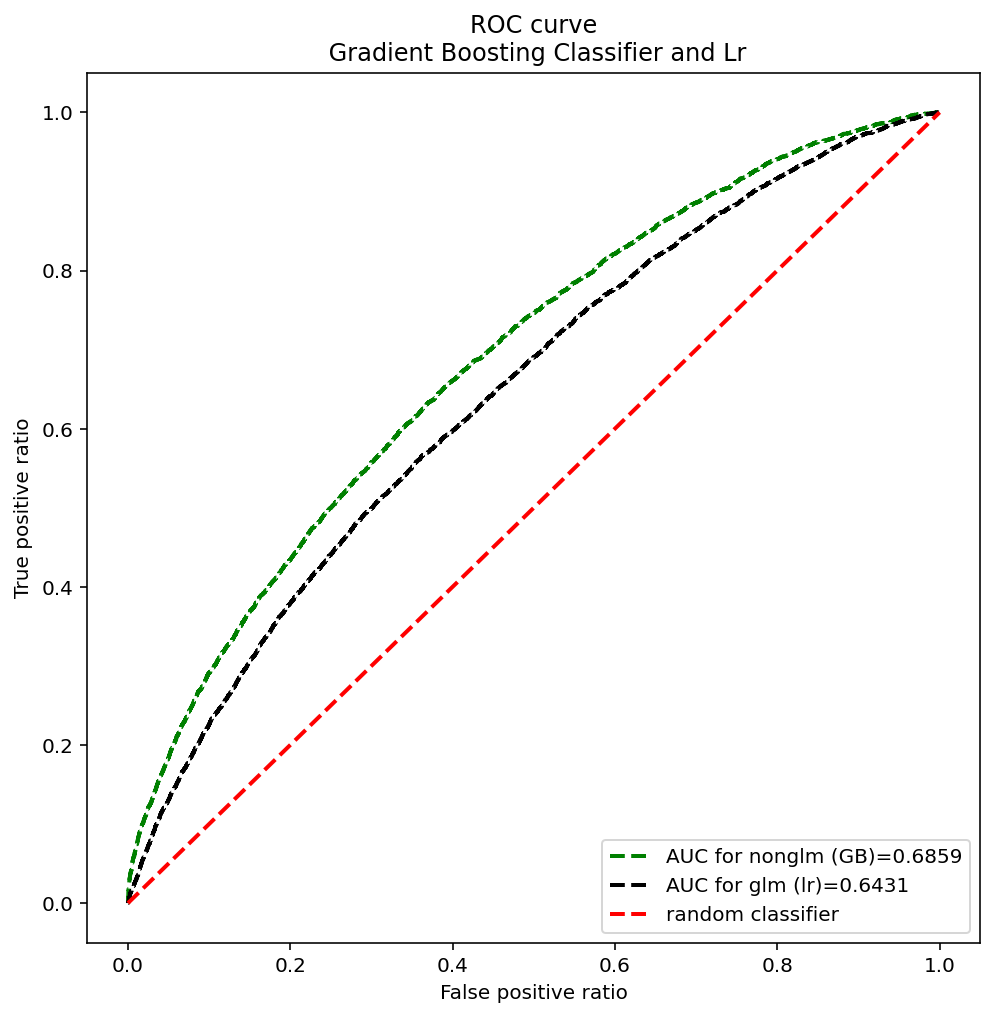

In [68]:
plt.figure(figsize=(8,8))
plt.plot(fpr_gb,tpr_gb, 'g--', linewidth=2, markersize=2,
         label="AUC for nonglm (GB)="+str(round(auc_gb,4)))

# plt.plot(fpr_mlp,tpr_mlp, 'b--', linewidth=2, markersize=2,
#          label="AUC MLP="+str(round(auc_mlp,4)))

plt.plot(fpr_lr,tpr_lr, 'k--', linewidth=2, markersize=2,
         label="AUC for glm (lr)="+str(round(auc_lr,4)))

plt.plot([0,1],[0,1], 'r--', linewidth=2, markersize=2,
         label='random classifier')

plt.legend(loc=4)
plt.xlabel('False positive ratio')
plt.ylabel('True positive ratio')
plt.title('ROC curve\n Gradient Boosting Classifier and Lr')

plt.savefig("../Figures/plot_01_1_roc_GB_lr.png")
plt.show()

# Feature engineering

let's make some new features and check out if they can improve the logistic regression performance

In [69]:
top_20_numeric_features

Index(['y', 'x47', 'x40', 'x16', 'x62', 'x68', 'x70', 'x89', 'x18', 'x52',
       'x28', 'x75', 'x96', 'x81', 'x95', 'x35', 'x53', 'x32', 'x88', 'x46'],
      dtype='object')

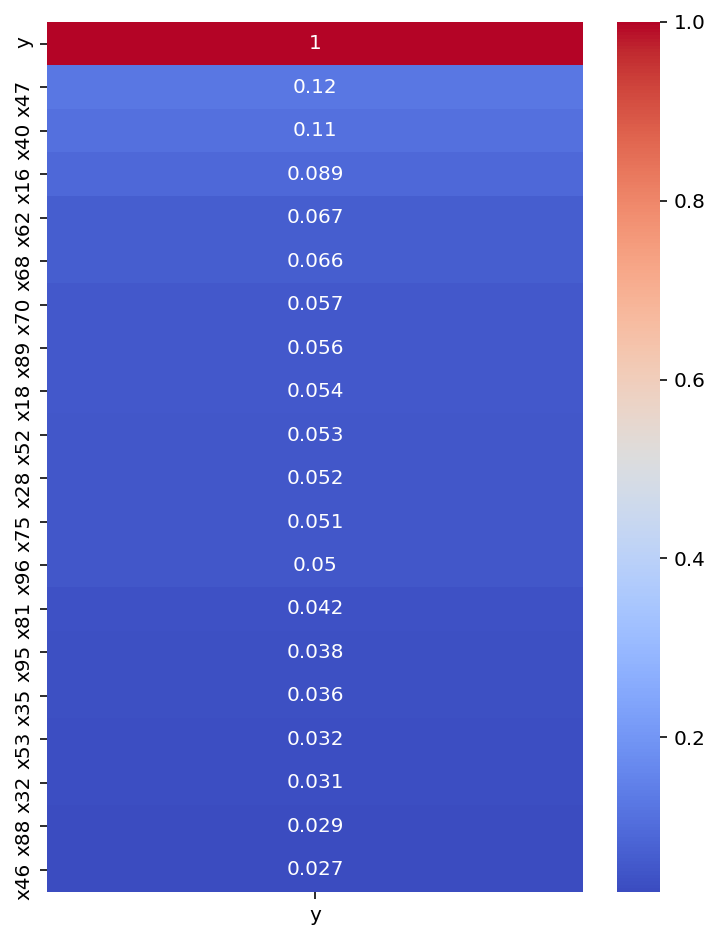

In [70]:
df_numerics_corr = abs(df_numerics[top_20_numeric_features].corr())
plt.figure(figsize=(6,8))
sns.heatmap(df_numerics_corr[['y']].sort_values(by=['y'],
                                                ascending=False),
#             vmin=-1,
#             vmax=0.2,
            cmap='coolwarm',
            annot=True);

In [71]:
df_numerics['x47x40*'] = df_numerics['x47']*df_numerics['x40']

In [72]:
df_numerics_corr = abs(df_numerics.corr())
df_numerics_corr[['y']].sort_values(by=['y'],ascending=False)[0:20].index

Index(['y', 'x47x40*', 'x47', 'x40', 'x16', 'x62', 'x68', 'x70', 'x89', 'x18',
       'x52', 'x28', 'x75', 'x96', 'x81', 'x95', 'x35', 'x53', 'x32', 'x88'],
      dtype='object')

In [73]:
top_20_numeric_features_newfeaturedengineered = \
                            df_numerics_corr[['y']].sort_values(by=['y'],
                            ascending=False)[0:20].index

In [74]:
top_20_numeric_features_newfeaturedengineered = list(top_20_numeric_features_newfeaturedengineered)
# top_20_numeric_features_newfeaturedengineered.remove('y')

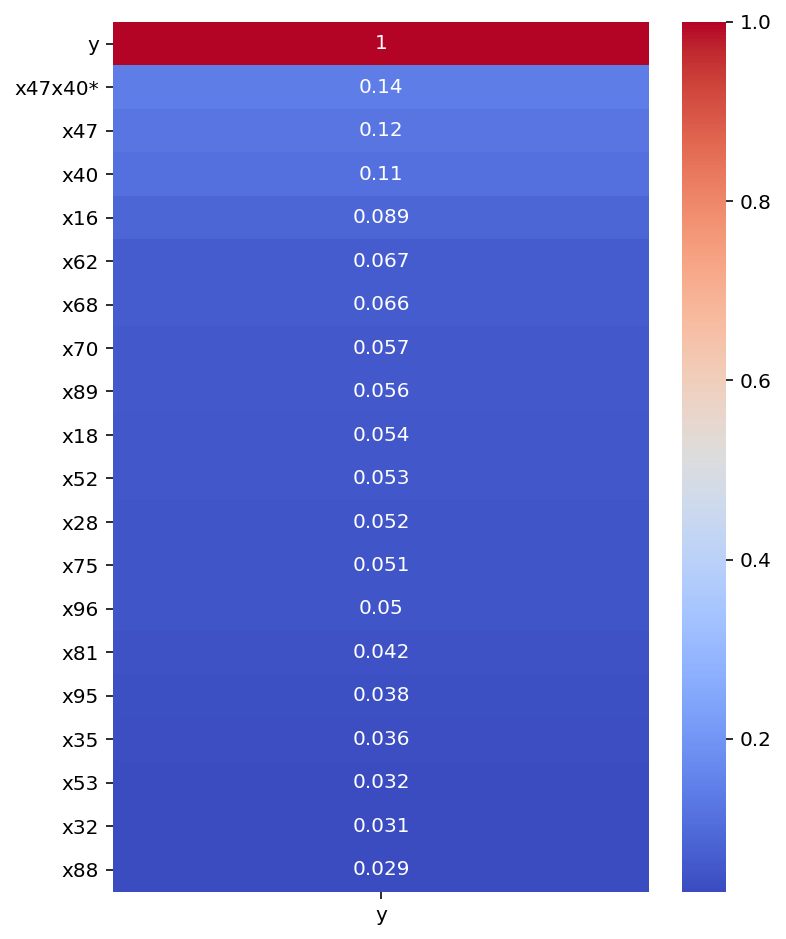

In [75]:
df_numerics_corr = abs(df_numerics[top_20_numeric_features_newfeaturedengineered].corr())
plt.figure(figsize=(6,8))
sns.heatmap(df_numerics_corr[['y']].sort_values(by=['y'],
                                                ascending=False),
#             vmin=-1,
#             vmax=0.2,
            cmap='coolwarm',
            annot=True);

In [76]:
# rest on nemeric feature pipe
top_20_features_pipe = Pipeline([('imp',SimpleImputer(strategy="mean")), 
                               ('scaler',StandardScaler()),
                               ('p_tf',PowerTransformer()),
                                     ])



preprocessor = make_column_transformer((top_20_features_pipe, 
                                        top_20_numeric_features_newfeaturedengineered))

preprocessor.fit_transform(df_numerics)[0]

array([-0.4119384 ,  1.17342905,  0.76052553,  0.97514058,  0.72264396,
        1.21674877,  0.23061774, -0.44914114,  0.47845725, -0.33625636,
        0.84037209, -0.06899902, -0.52097011,  0.1241902 , -0.31492535,
        0.04664261,  1.12600949,  0.43973339, -0.68519579,  0.62458269])

In [77]:
top_20_numeric_features_newfeaturedengineered.remove('y')

In [78]:
Final_pipe_lr = Pipeline(steps=[('preprocessor', 
                                 preprocessor),
                                ('classiffier', 
                                 logreg)])

In [79]:
X_all_features['x47x40*'] = df_numerics['x47x40*']

In [80]:
cross_val_score(Final_pipe_lr, X_all_features, y, cv=5, scoring='roc_auc', n_jobs=-1)

array([0.64480528, 0.63152753, 0.66245802, 0.63696104, 0.62629352])

well, I don't see any improvement in lr performance using new features engineered variable. note that featuring a new variable through multiplication results in a new variable with a high covariance effect in the data.

# Trying models with both imprtant categorical and numerical features.

let's use the following categorical features along with the top 20 numerical features and see how it affects the lr performance. I will go with the following features that I achieved in the P01_01 categorical analysis of this study. The SelectKBest was used to find the best catogorical features.

```['x3', 'x24', 'x31', 'x33', 'x60', 'x65', 'x77', 'x93']```

We also need to take care of some edits on the above categorical features. I came up with the column transformer and pipeline in the P02_3 modeling of this study. 

## preprocessor pipeline

In [83]:
def custom_edit_x3(df_categ):
    
    # https://stackoverflow.com/questions/60237488/python-replace-only-exact-word-in-string
    for i, string in enumerate(df_categ['x3'].values):
        df_categ['x3'].values[i] = re.sub(r'\bTue\b', 'Tuesday', string)

    for i, string in enumerate(df_categ['x3'].values):
        df_categ['x3'].values[i] = re.sub(r'\bSun\b', 'Sunday', string)

    for i, string in enumerate(df_categ['x3'].values):
        df_categ['x3'].values[i] = re.sub(r'\bSat\b', 'Saturday', string)

    for i, string in enumerate(df_categ['x3'].values):
        df_categ['x3'].values[i] = re.sub(r'\bFri\b', 'Friday', string)

    for i, string in enumerate(df_categ['x3'].values):
        df_categ['x3'].values[i] = re.sub(r'\bWed\b', 'Wednesday', string)

    for i, string in enumerate(df_categ['x3'].values):
        df_categ['x3'].values[i] = re.sub(r'\bMon\b', 'Monday', string)

    for i, string in enumerate(df_categ['x3'].values):
        df_categ['x3'].values[i] = re.sub(r'\bThur\b', 'Thursday', string)
    return df_categ
    
    return df_categ

In [84]:
custom_edit_x3_tf = FunctionTransformer(custom_edit_x3)
ct = make_column_transformer((custom_edit_x3_tf, ['x3']))

In [85]:
x3_pipe = make_pipeline(custom_edit_x3_tf, SimpleImputer(strategy="most_frequent"), OneHotEncoder())
ct = make_column_transformer((x3_pipe, ['x3']))
ct.fit_transform(df).toarray()[0].size

7

In [87]:
# x3 pipe
x3_pipe = Pipeline([('custom_edit_x3_tf', custom_edit_x3_tf), 
                   ('imp', SimpleImputer(strategy="most_frequent")), 
                   ('ohe', OneHotEncoder())])
# two tf pipe
two_step_transformer_pipe = Pipeline([('imp', SimpleImputer(strategy="most_frequent")), 
                                                     ('ohe',OneHotEncoder())])

# # numeric -> categ OHE pipe
# numer_OHE_x59_x79_x98_pipe = Pipeline([('imp_ohe', SimpleImputer(strategy="most_frequent")), 
#                                         ('ohe',OneHotEncoder())])

# numeric skewness tf
numer_skewness_pipe = Pipeline([('imp',SimpleImputer(strategy="mean")), 
                               ('scaler',StandardScaler()),
                                ('p_tf',PowerTransformer()),
#                                ('selector',VarianceThreshold(0.01)),
                              ])

# custom x7 tf
# custom_edit_x7_tf = FunctionTransformer(custom_edit_x7)
# # custom x19 tf
# custom_edit_x19_tf = FunctionTransformer(custom_edit_x19)


# rest on nemeric feature pipe
Rest_numeric_features_pipe = Pipeline([('imp',SimpleImputer(strategy="mean")), 
                               ('scaler',StandardScaler()),
                                ('p_tf',PowerTransformer()),
#                                ('selector',VarianceThreshold(0.05)),
#                             PCA(n_components=20),
                                     ])

In [88]:
preprocessor = make_column_transformer((x3_pipe, ['x3']),
                            # important catogorical features
                            (two_step_transformer_pipe, ['x24','x31','x33','x60','x65','x77','x93']),
#                             (numer_OHE_x59_x79_x98_pipe, ['x59', 'x79', 'x98']),
                             
                             # features with high skewness 
                            (numer_skewness_pipe, ['x13', 'x21', 'x32', 'x35', 
                                              'x44', 'x59', 'x67', 'x73', 
                                              'x75', 'x79', 'x84', 'x89']),
#                              top 20 numerical features
                            (top_20_features_pipe, 
                                        ['x47', 'x40', 'x16', 'x62', 'x68', 
                                         'x70', 'x89', 'x18', 'x52',
                                       'x28', 'x75', 'x96', 'x81', 'x95', 
                                         'x35', 'x53', 'x32', 'x88', 'x46'])       
                                       

                             )

preprocessor.fit_transform(df)[0].size

119

## LogisticRegression 

In [96]:
weights = {0:0.85, 1:0.14}
logreg = LogisticRegression(solver='sag', 
                            class_weight=weights)

In [89]:
Final_pipe_lr = Pipeline(steps=[('preprocessor', 
                                 preprocessor),
                                ('classiffier', 
                                 logreg)])

In [90]:
cross_val_score(Final_pipe_lr, X_all_features, y, cv=5, scoring='roc_auc', n_jobs=-1)

array([0.6915763 , 0.67548208, 0.69670302, 0.6780998 , 0.66544816])

In [91]:
Final_pipe_lr.fit(X_all_features,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('custom_edit_x3_tf',
                                                                   FunctionTransformer(func=<function custom_edit_x3 at 0x7fbe9f93e158>)),
                                                                  ('imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  ['x3']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                          

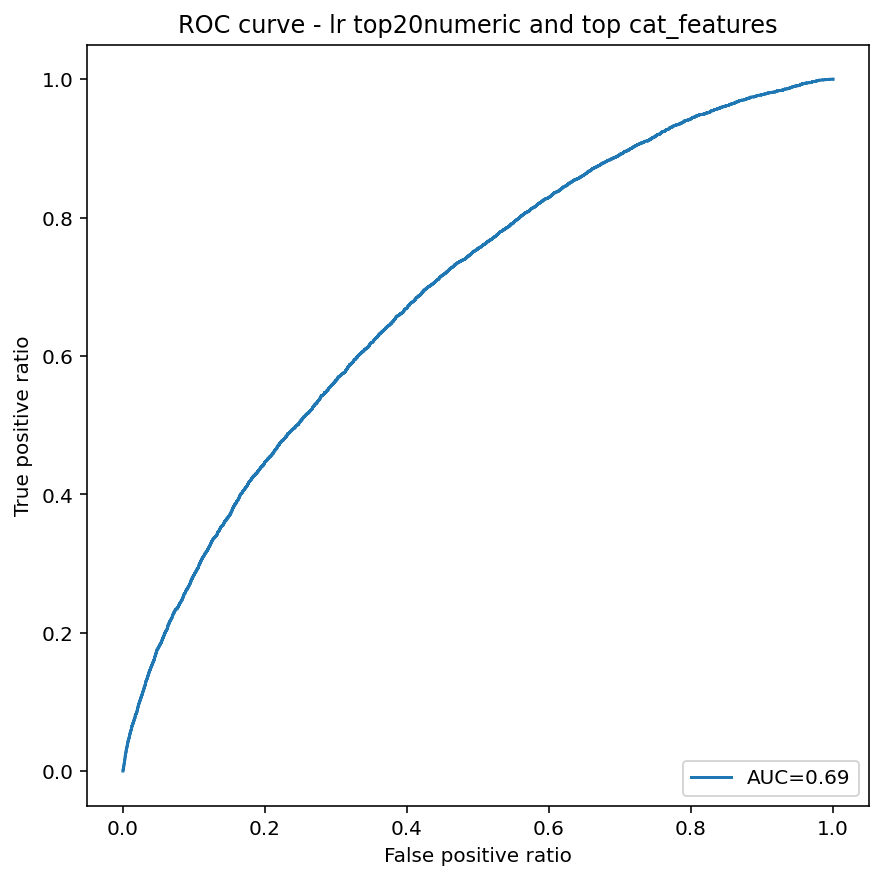

In [93]:
y_pred = Final_pipe_lr.predict(X_all_features)
y_prob = Final_pipe_lr.predict_proba(X_all_features)

plt.figure(figsize=(7,7))
# https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
fpr_lr2, tpr_lr2, _ = metrics.roc_curve(y,  y_prob[:,1])
auc_lr2 = metrics.roc_auc_score(y, y_prob[:,1])
plt.plot(fpr_lr2,tpr_lr2, label="AUC="+str(round(auc_lr2,2)))
plt.legend(loc=4)
plt.xlabel('False positive ratio')
plt.ylabel('True positive ratio')
plt.title('ROC curve - lr top20numeric and top cat_features')
plt.savefig("../Figures/plot_01_1_roc_lr2.png")
plt.show()

# GradientBoostingClassifier

In [97]:
Final_pipe_GB = Pipeline(steps=[('preprocessor', 
                                 preprocessor),
                                ('classiffier', 
                                 GradientBoostingClassifier(n_estimators=100, 
                                                            learning_rate=0.1,
                                                            max_depth=3, 
                                                            random_state=0))])

cross_val_score(Final_pipe_GB, X_all_features, y, cv=5, scoring='roc_auc', n_jobs=-1).mean()

0.6741981857476582

not impressive results for GradientBoostingClassifier. However, I will apply it with more features in the following notebooks

# Plot the ROC curves

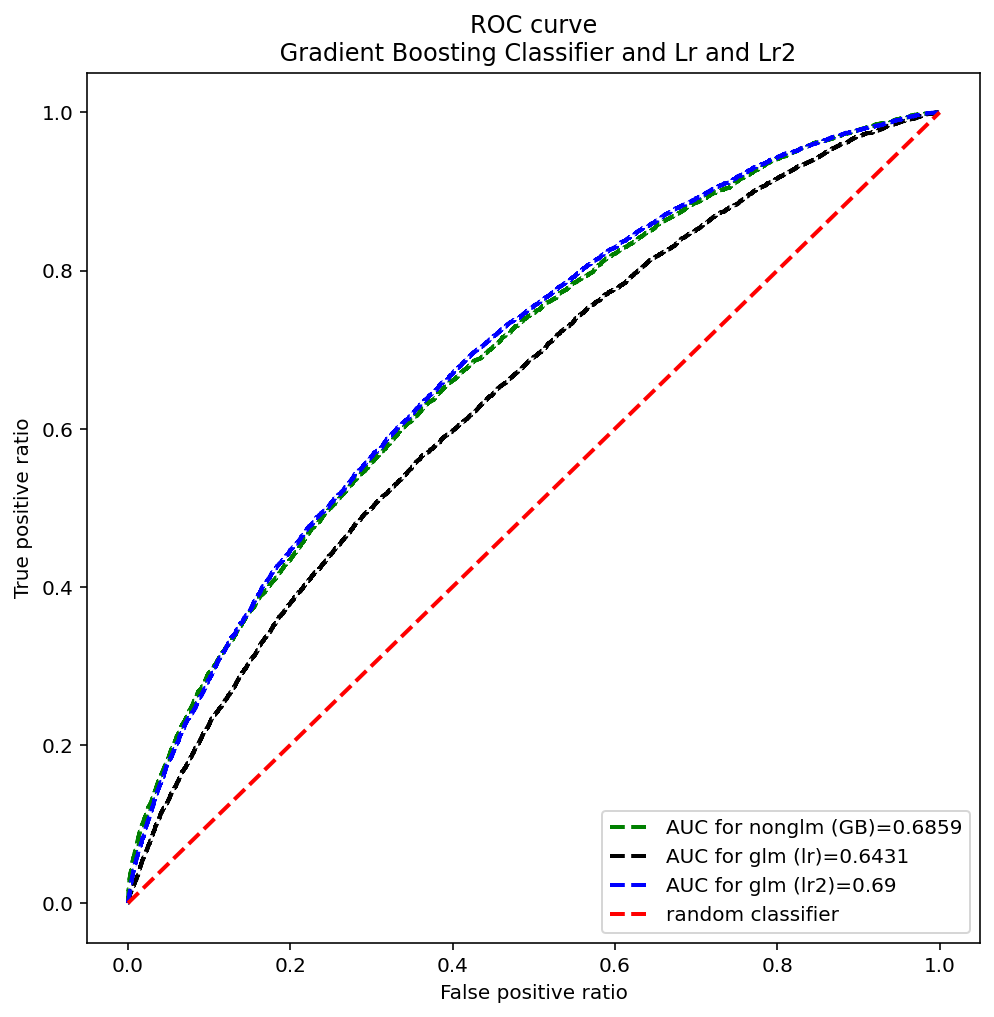

In [95]:
plt.figure(figsize=(8,8))
plt.plot(fpr_gb,tpr_gb, 'g--', linewidth=2, markersize=2,
         label="AUC for nonglm (GB)="+str(round(auc_gb,4)))

plt.plot(fpr_lr,tpr_lr, 'k--', linewidth=2, markersize=2,
         label="AUC for glm (lr)="+str(round(auc_lr,4)))

plt.plot(fpr_lr2,tpr_lr2, 'b--', linewidth=2, markersize=2,
         label="AUC for glm (lr2)="+str(round(auc_lr2,4)))

plt.plot([0,1],[0,1], 'r--', linewidth=2, markersize=2,
         label='random classifier')

plt.legend(loc=4)
plt.xlabel('False positive ratio')
plt.ylabel('True positive ratio')
plt.title('ROC curve\n Gradient Boosting Classifier and Lr and Lr2')

plt.savefig("../Figures/plot_01_1_roc_GB_lr_lr2.png")
plt.show()

the logistic regression performance was improved by filtering the input features and including the important numerical and categorical parameters.